In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from models import VictimParams
from qiskit.result import marginal_counts

In [2]:
provider = IBMProvider()

# Job - ci68jhtejm3lf1f43970

In [3]:
job_id = 'cidf12ru5mrpmc96e37g'

In [5]:
with open('./delay_experiments/delay_exps_3.p', 'rb') as f:
    (empty_qc, experiment_qcs) = pickle.load(f)

In [11]:
# [
#     h_delay_h_qcs, sx_delay_sx_x_qcs,
#     h_xxxx_h_qcs, sx_xxxx_sx_x_qcs,
#     h_delayxx_h_qcs, sx_delayxx_sx_x_qcs
# ] = experiment_qcs

In [7]:
job = provider.backend.retrieve_job(job_id)
qcs = job.circuits()
counts = job.result().get_counts()

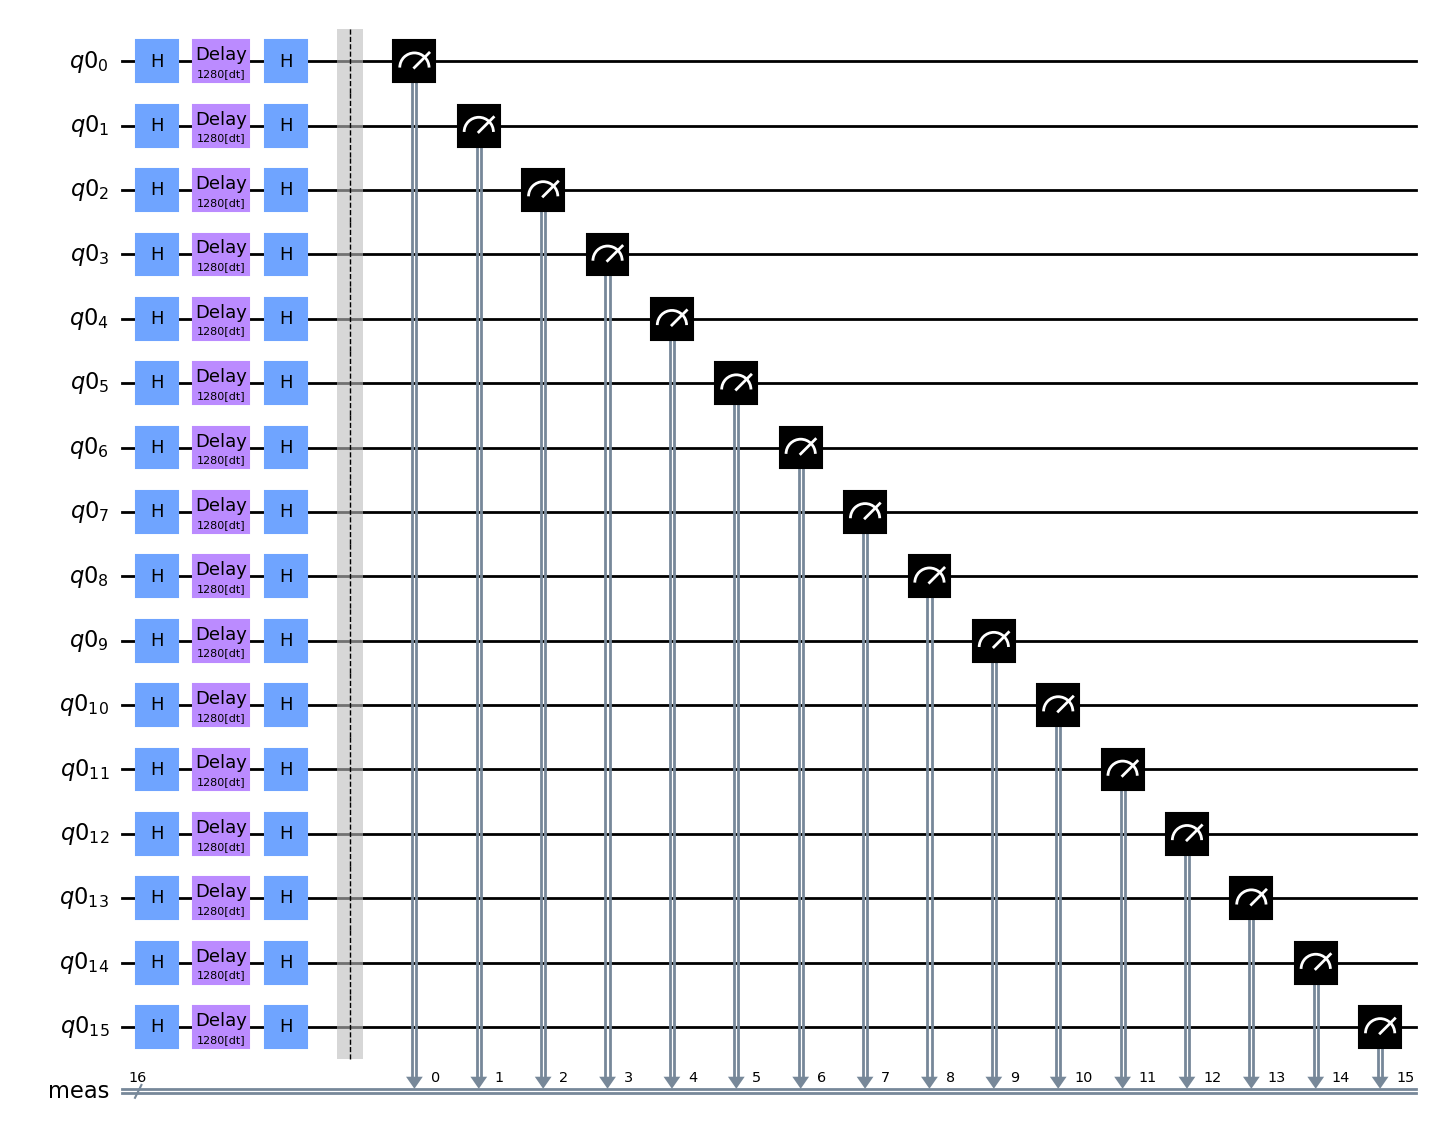

In [13]:
h_delay_h_qcs[3].draw('mpl')

In [8]:
qcs[3].name

'H, delay, H-121'

In [8]:
# sx_delay_sx_x_qcs[2].name

## Empty QC

In [9]:
count = counts[0]

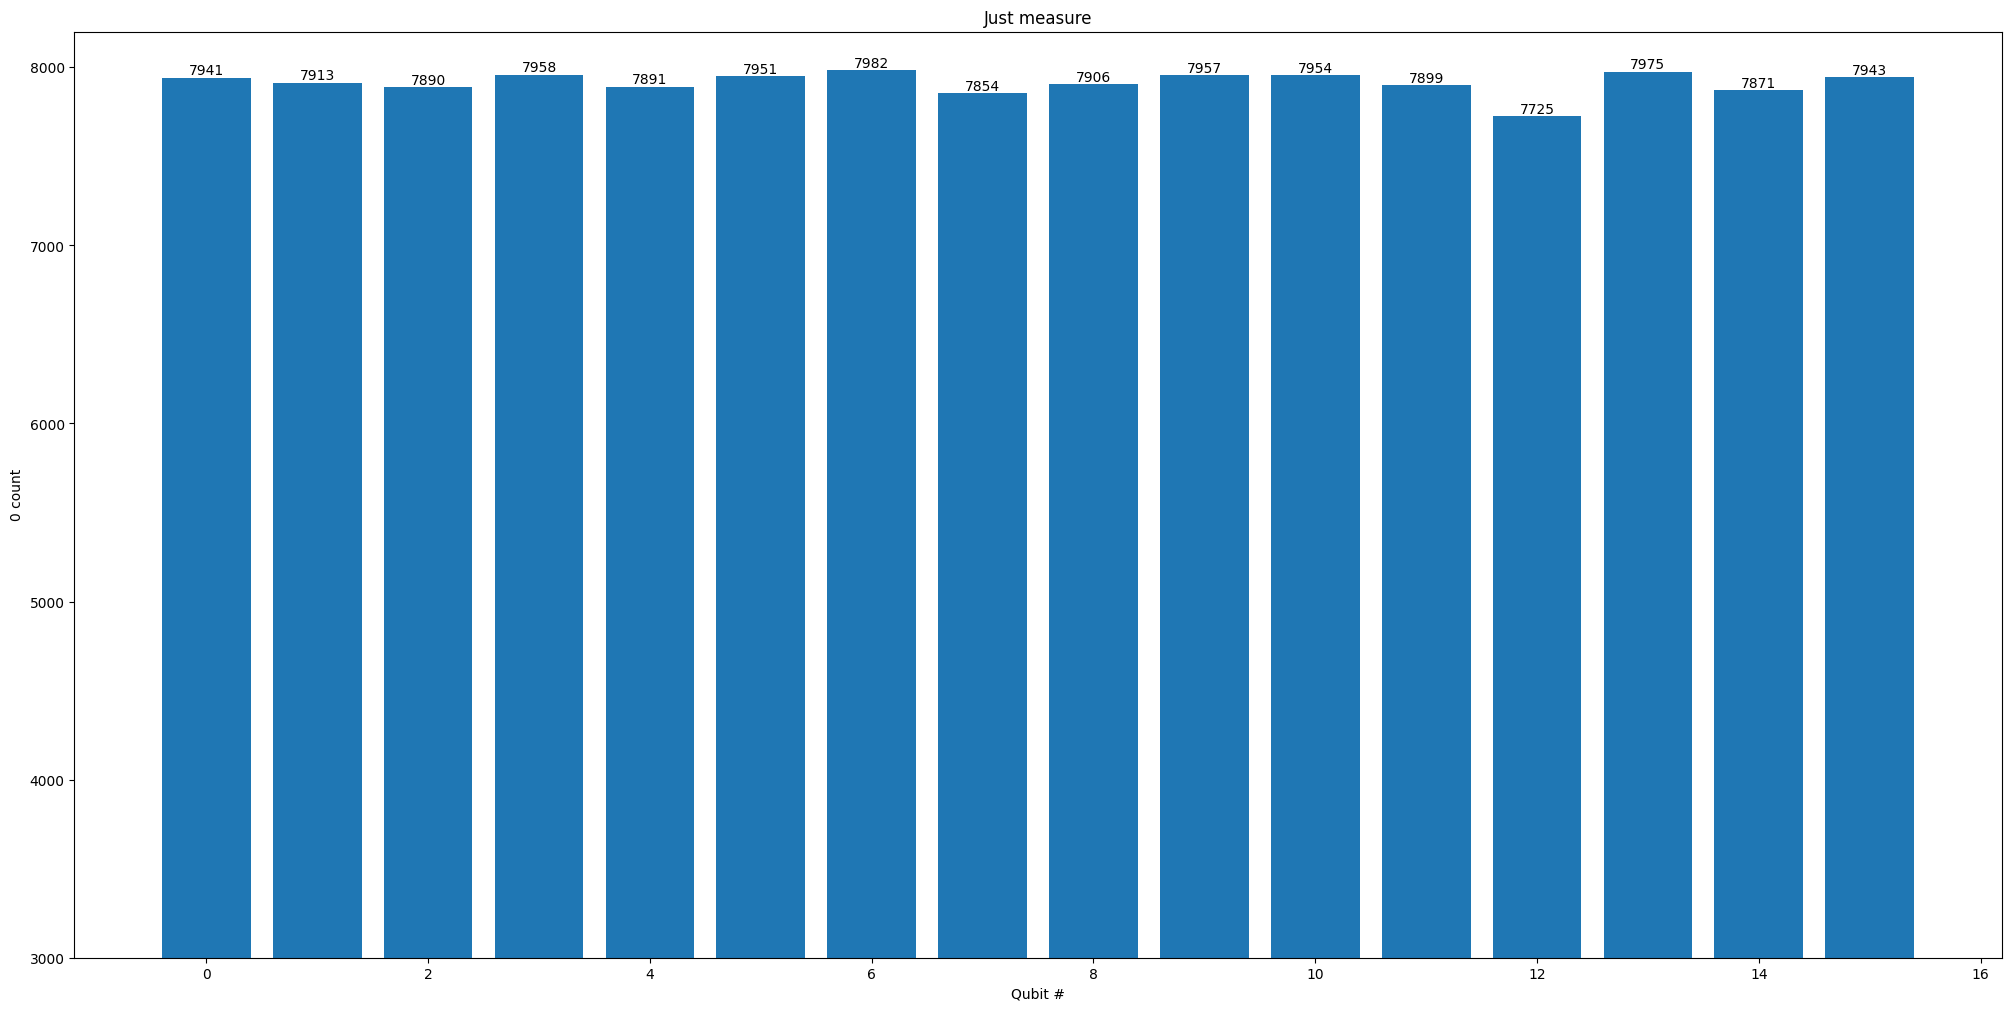

In [10]:
data = []
for j in range(16):
    c = marginal_counts(count, [j,]).get('0', 0)
    data.append(c)
fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))
# Add value labels on top of each bar
for j, value in enumerate(data):
    plt.text(j, value, str(value), ha='center', va='bottom')
x = range(len(data))
ax.bar(x, data)
ax.set_ylim(3000, 8200)
ax.set_title('Just measure')
ax.set_xlabel('Qubit #')
ax.set_ylabel('0 count')
plt.show()

## Split counts

In [11]:
split_counts = []

In [12]:
start_index = 1
for experiment_qc in experiment_qcs:
    end_index = start_index + len(experiment_qc)
    split_counts.append(counts[start_index: end_index])
    start_index = end_index

## H - delay - H

In [13]:
counts_2 = split_counts[0]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'H - delay - H'
snooper_qubits = range(16)

range(0, 8)


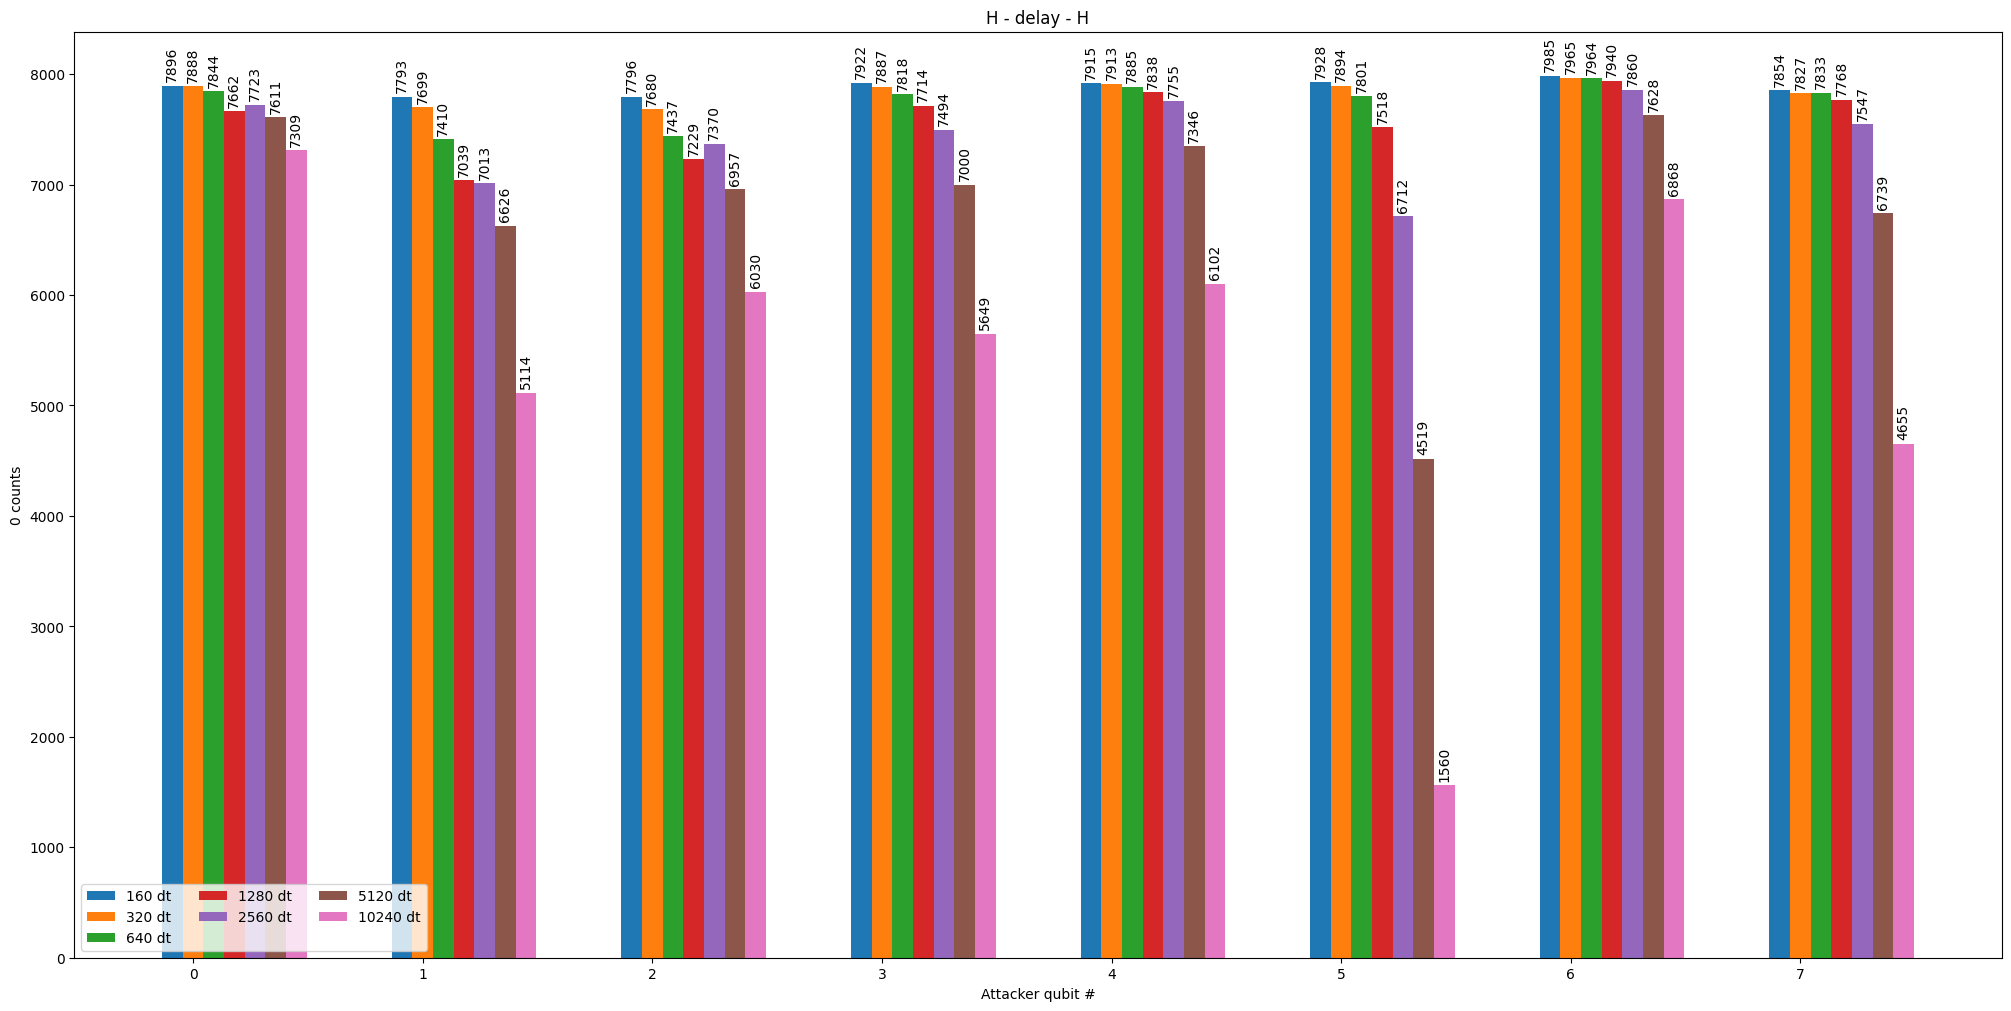

range(8, 16)


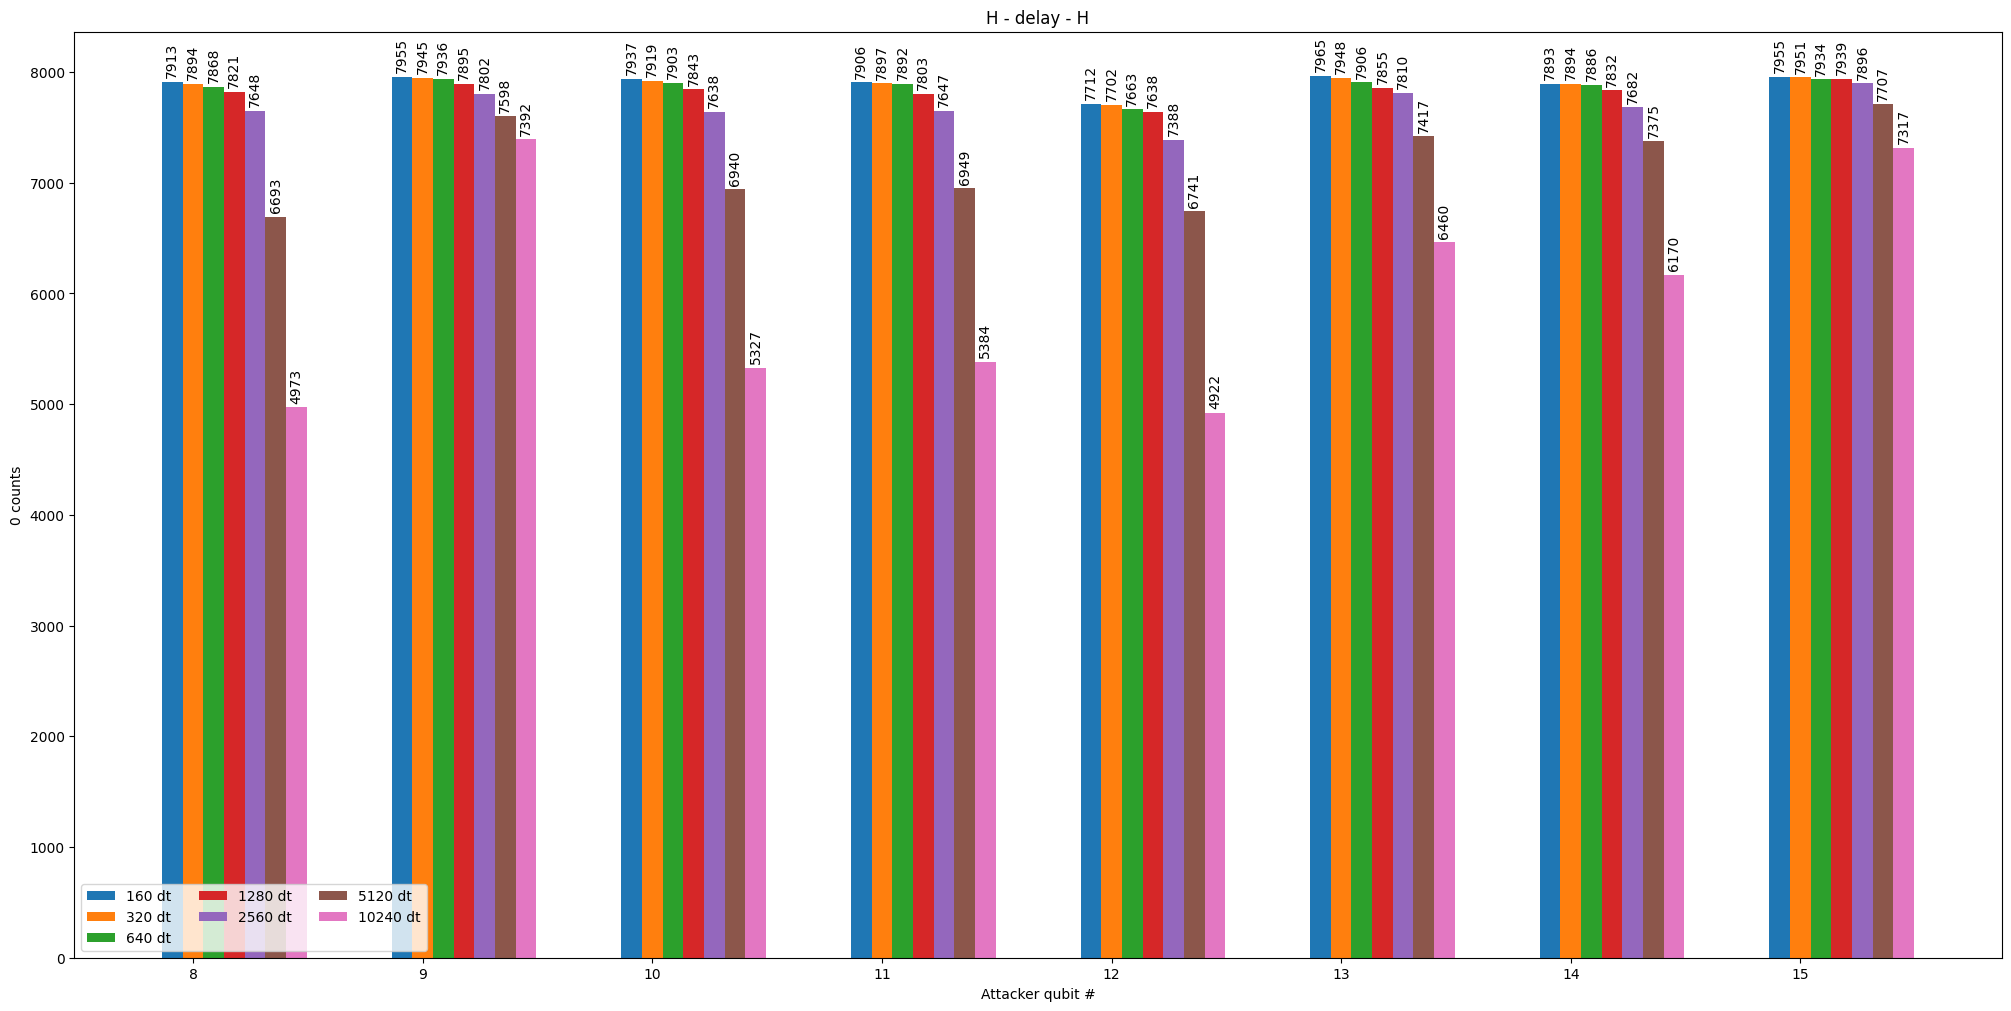

In [14]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## SX - delay - SX - X

In [15]:
counts_2 = split_counts[1]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'SX - delay - SX - X'
snooper_qubits = range(16)

range(0, 8)


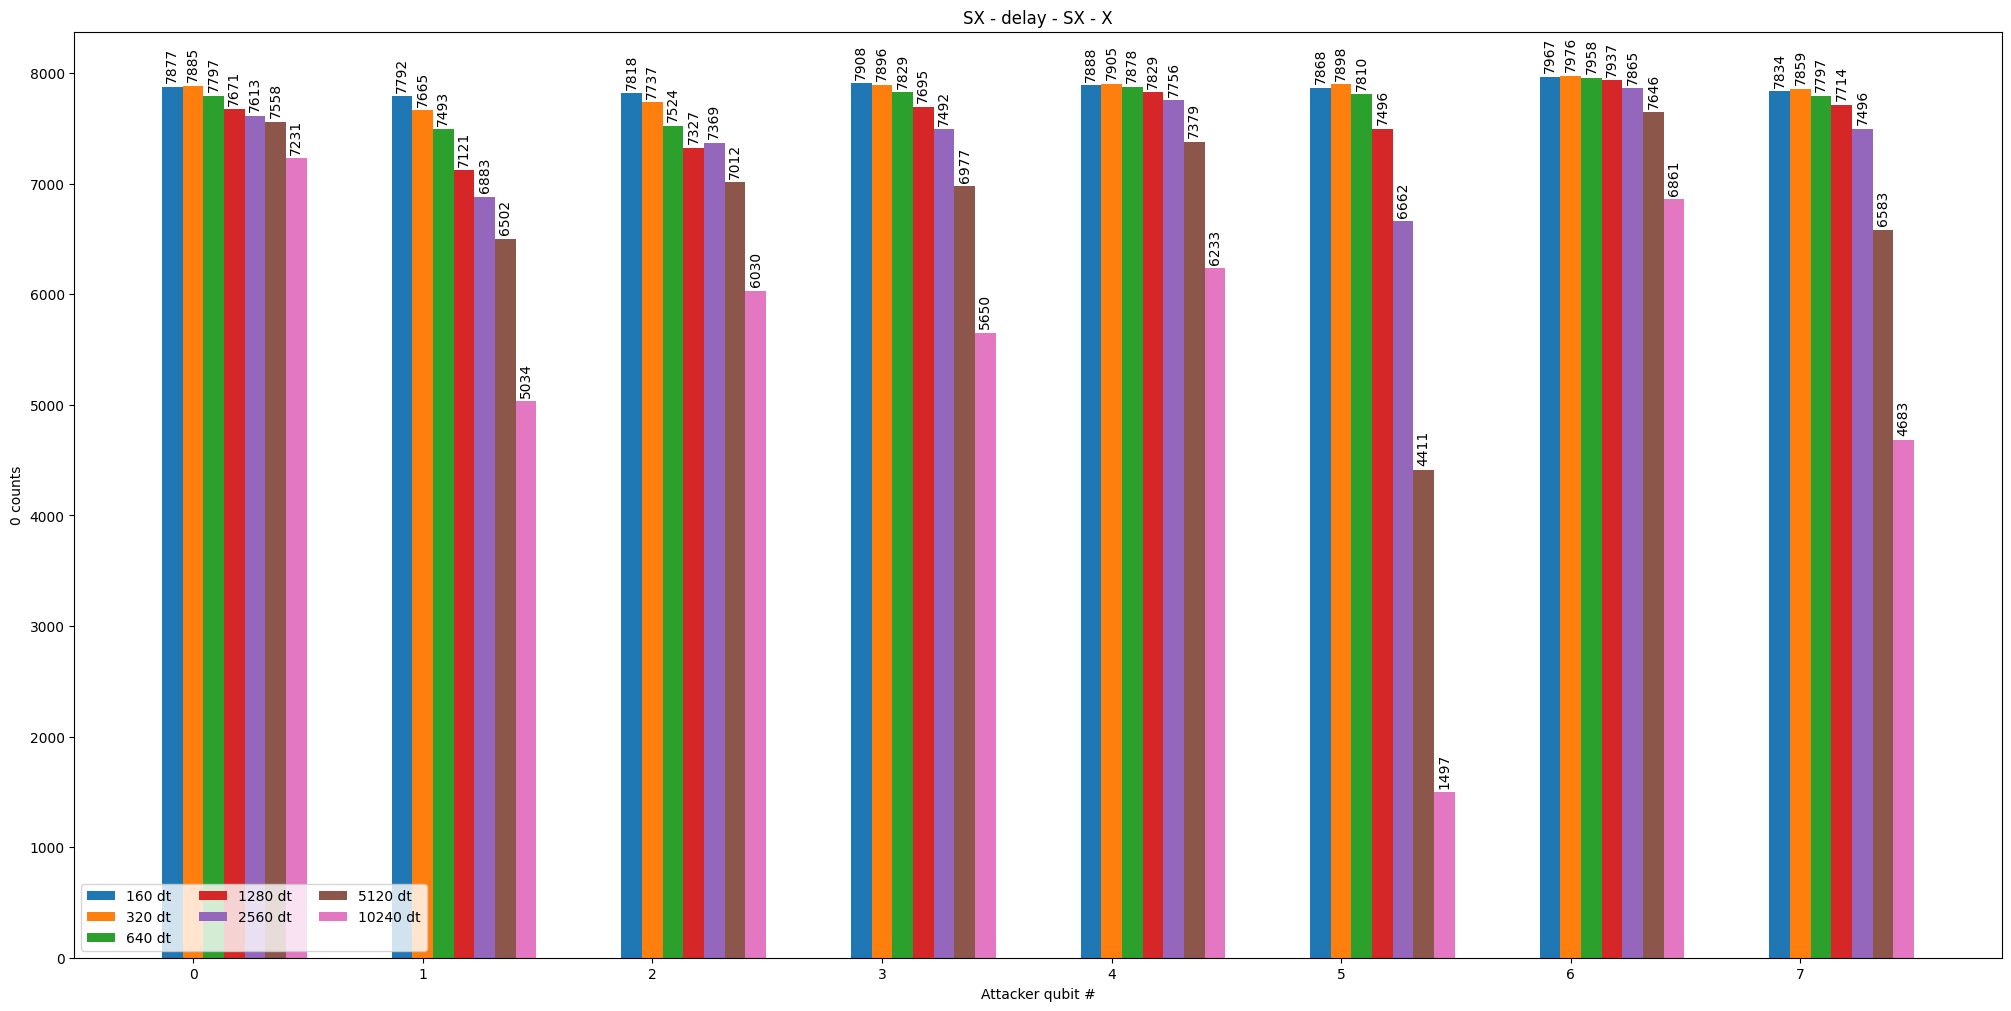

range(8, 16)


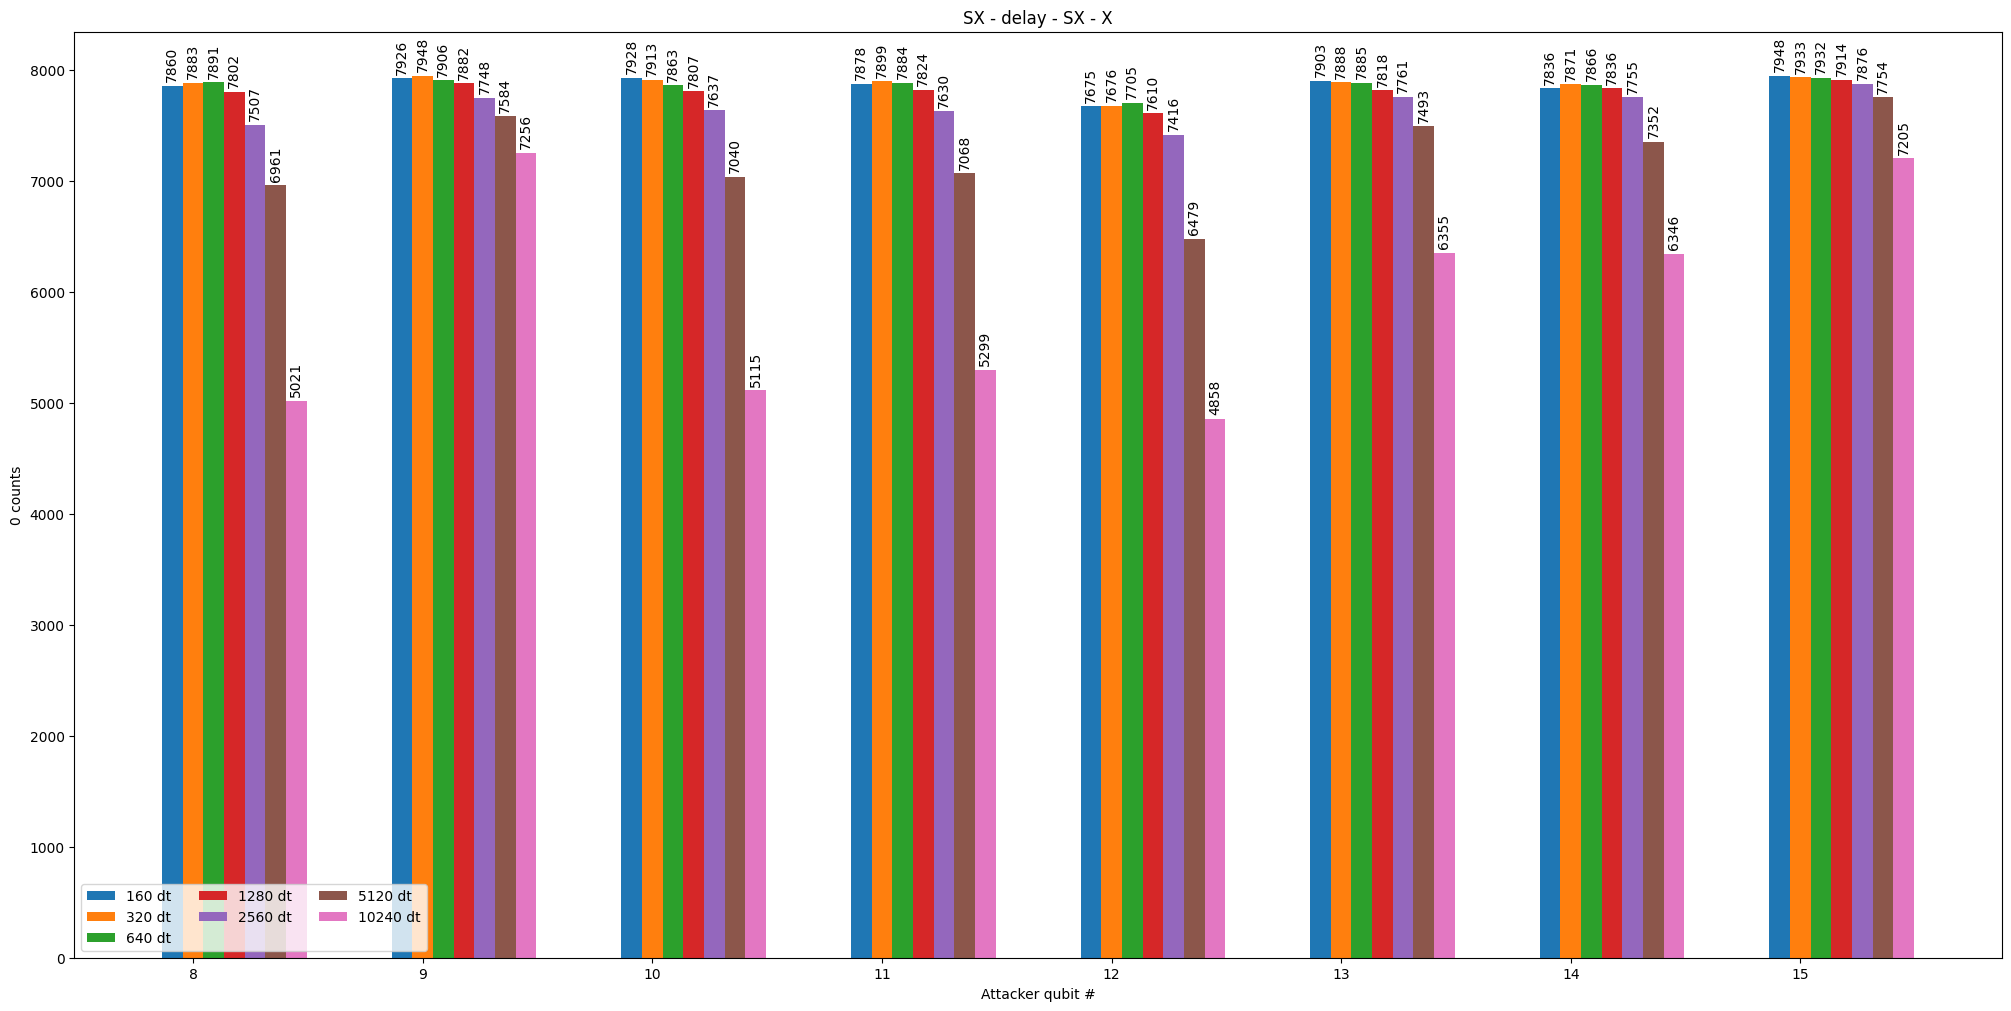

In [16]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## h_xxxx_h_qcs

In [17]:
counts_2 = split_counts[2]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'H - XXXX - H'
snooper_qubits = range(16)

range(0, 8)


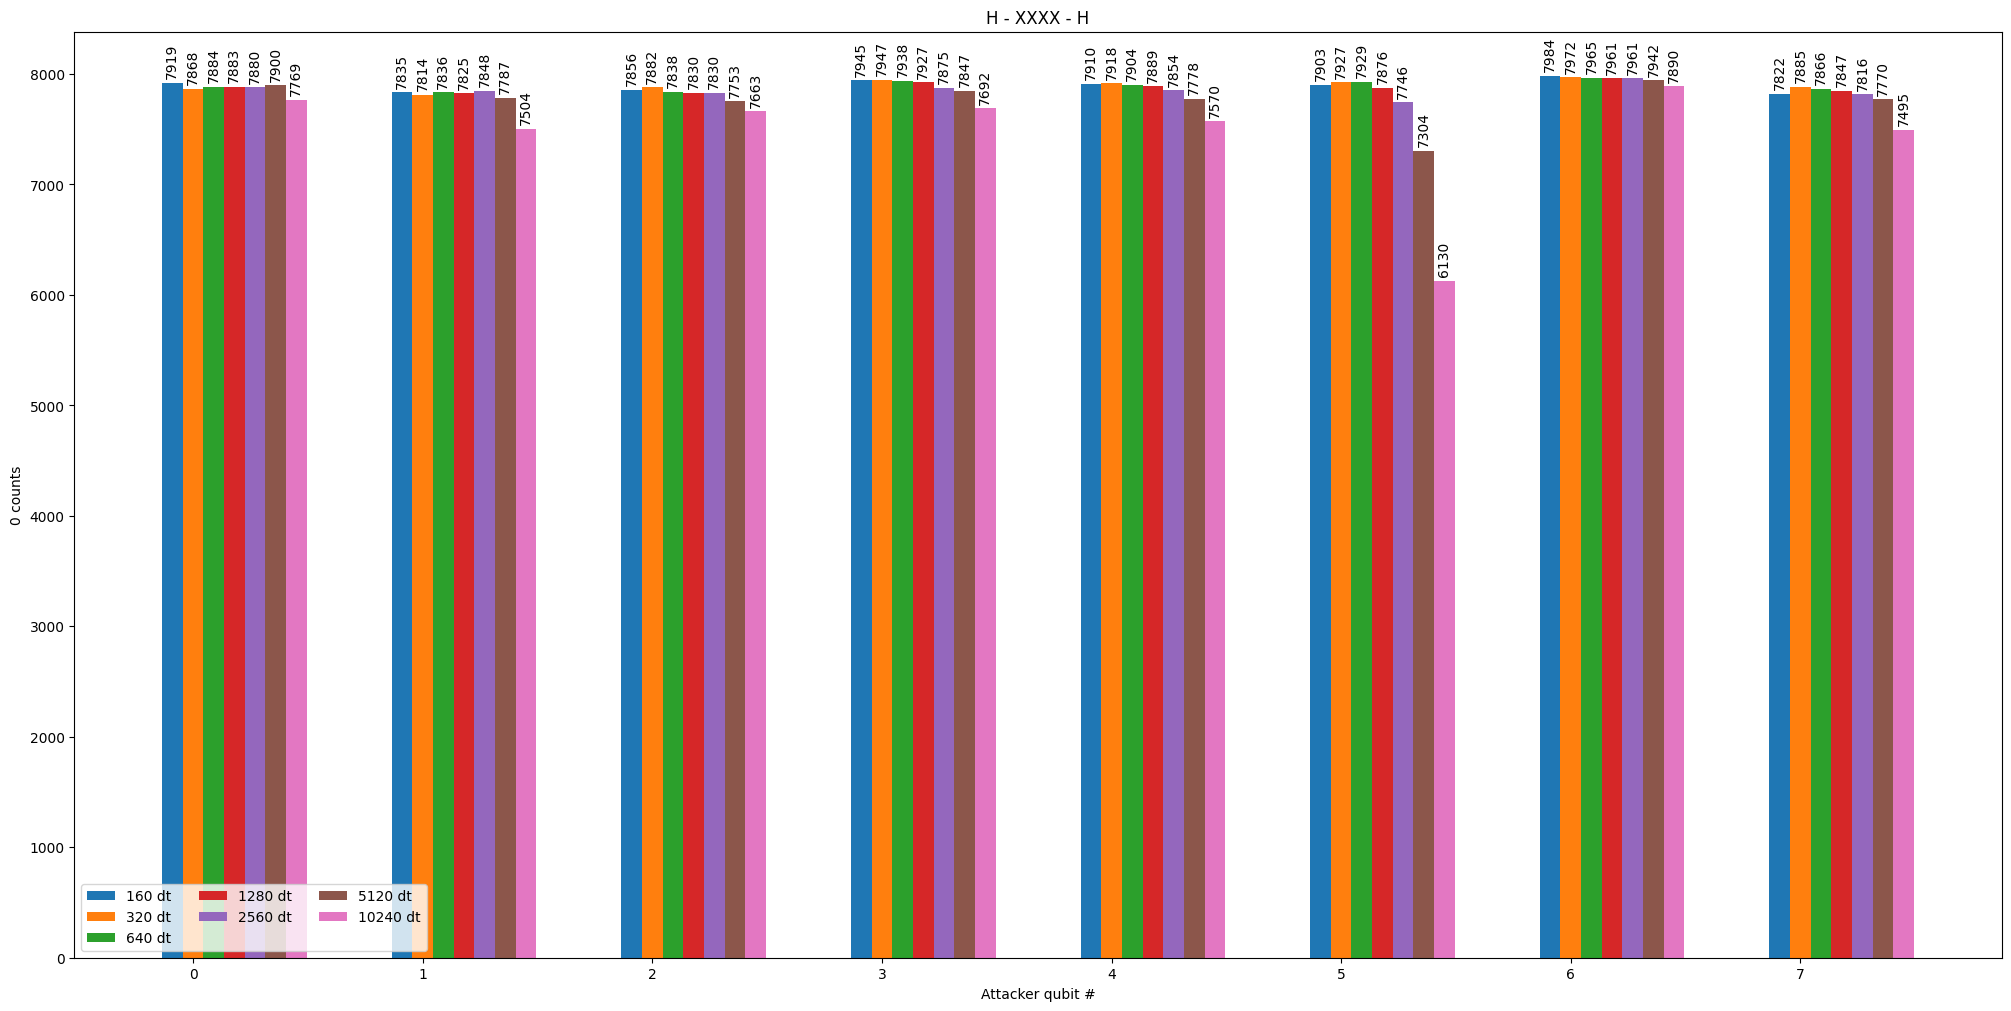

range(8, 16)


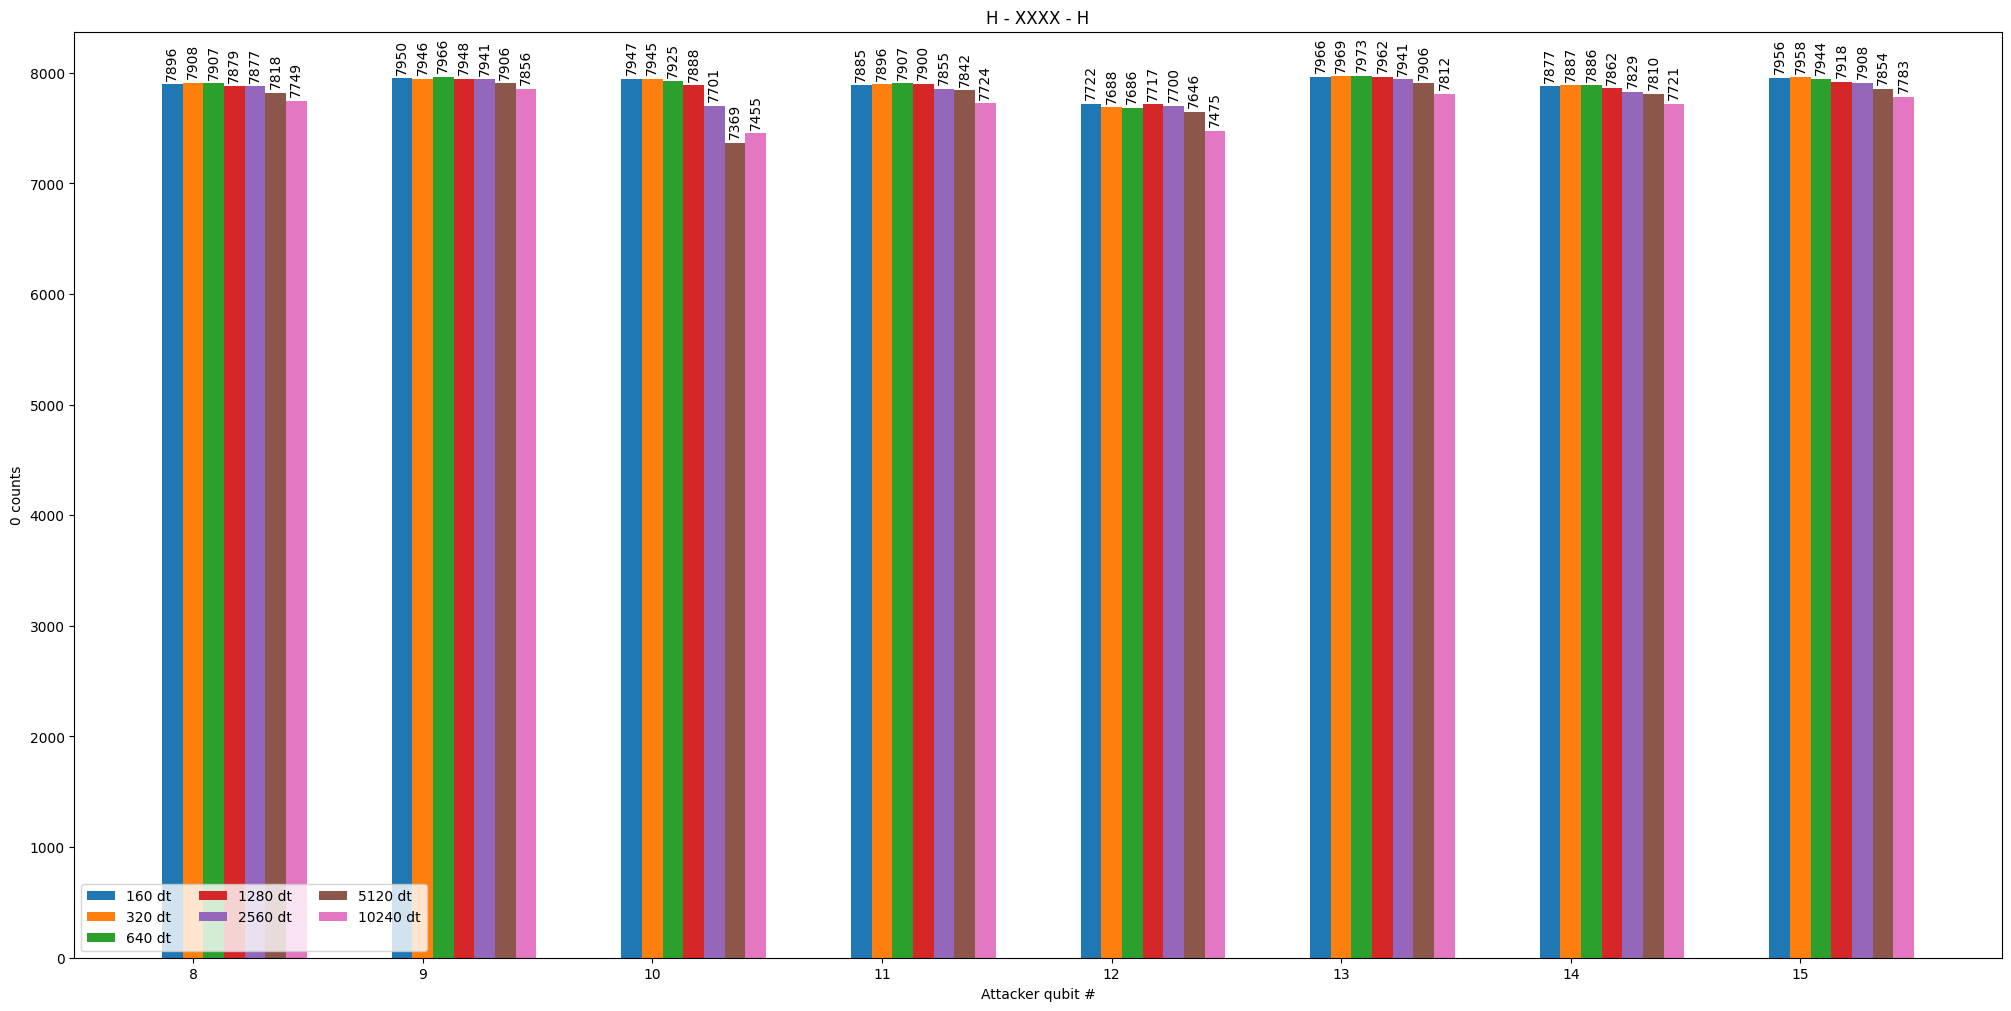

In [18]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## sx_xxxx_sx_x_qcs

In [19]:
counts_2 = split_counts[3]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'SX - XXXXX - SX - X'
snooper_qubits = range(16)

range(0, 8)


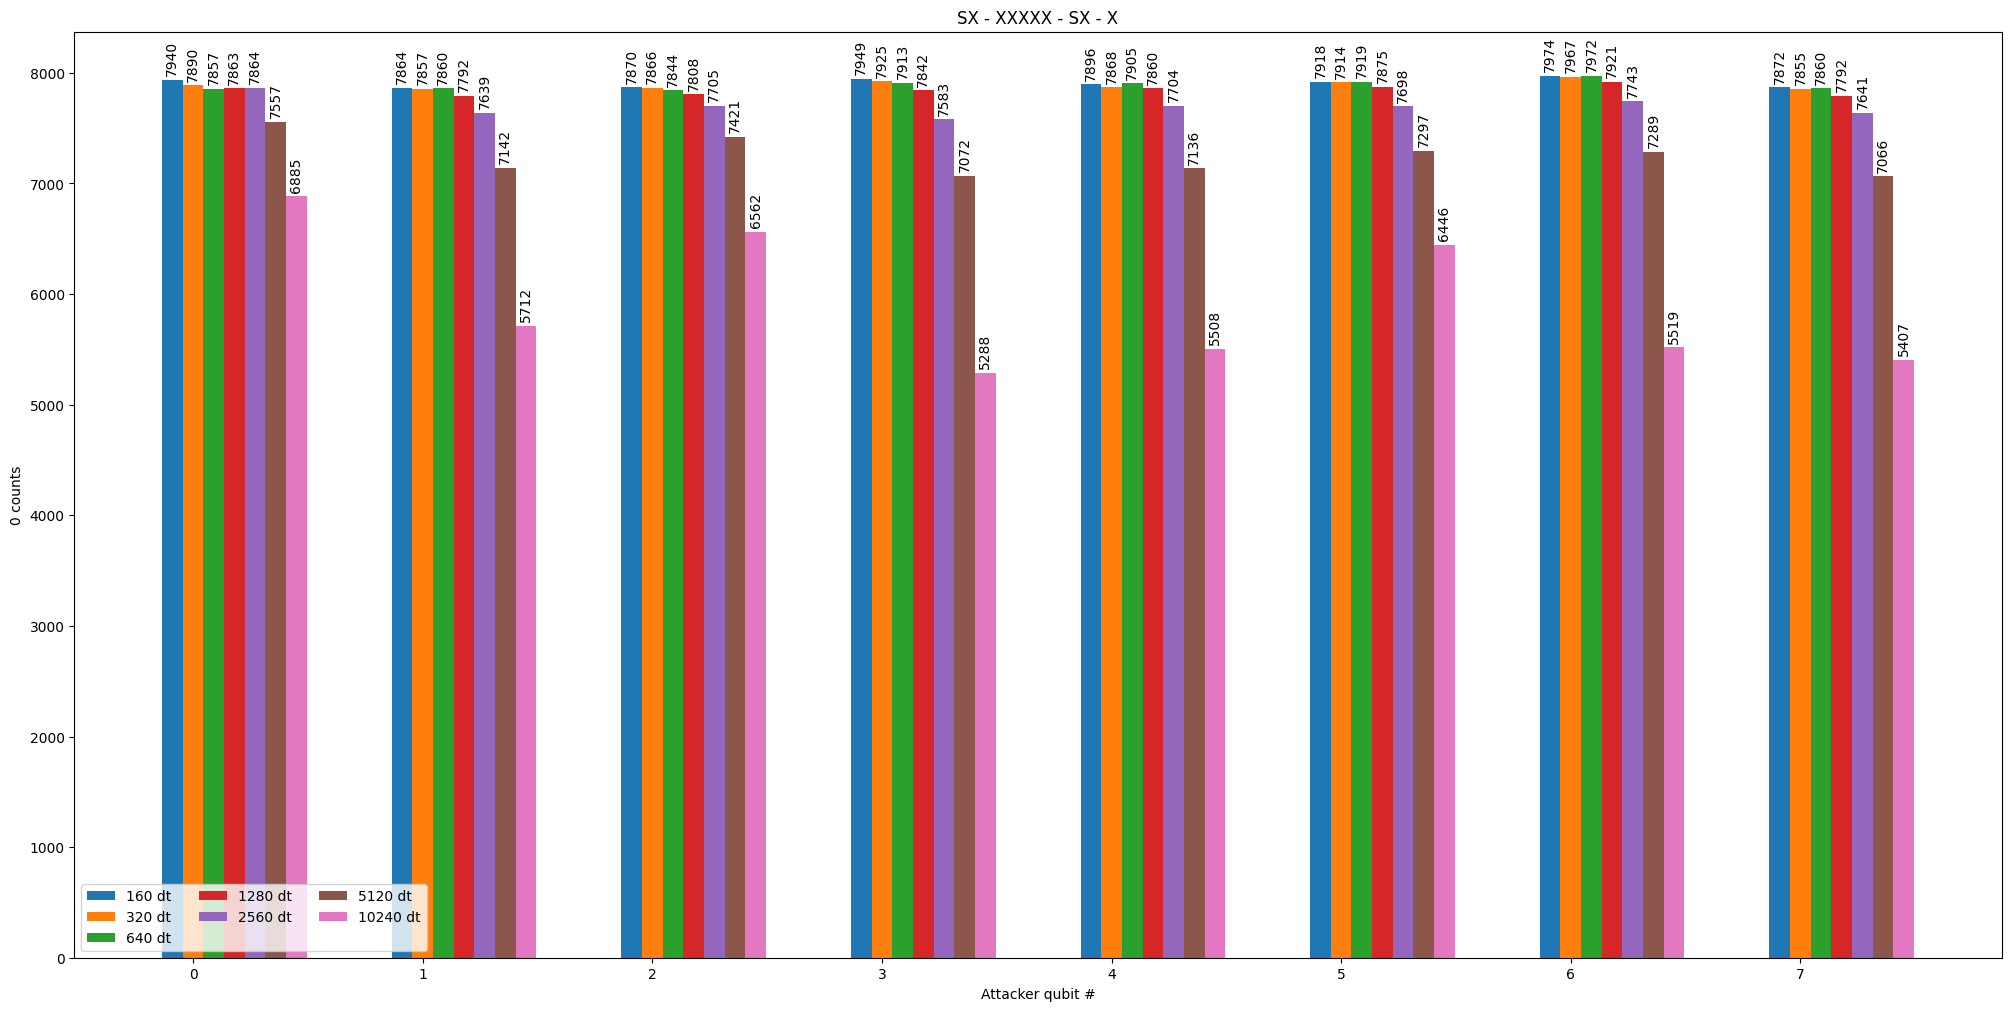

range(8, 16)


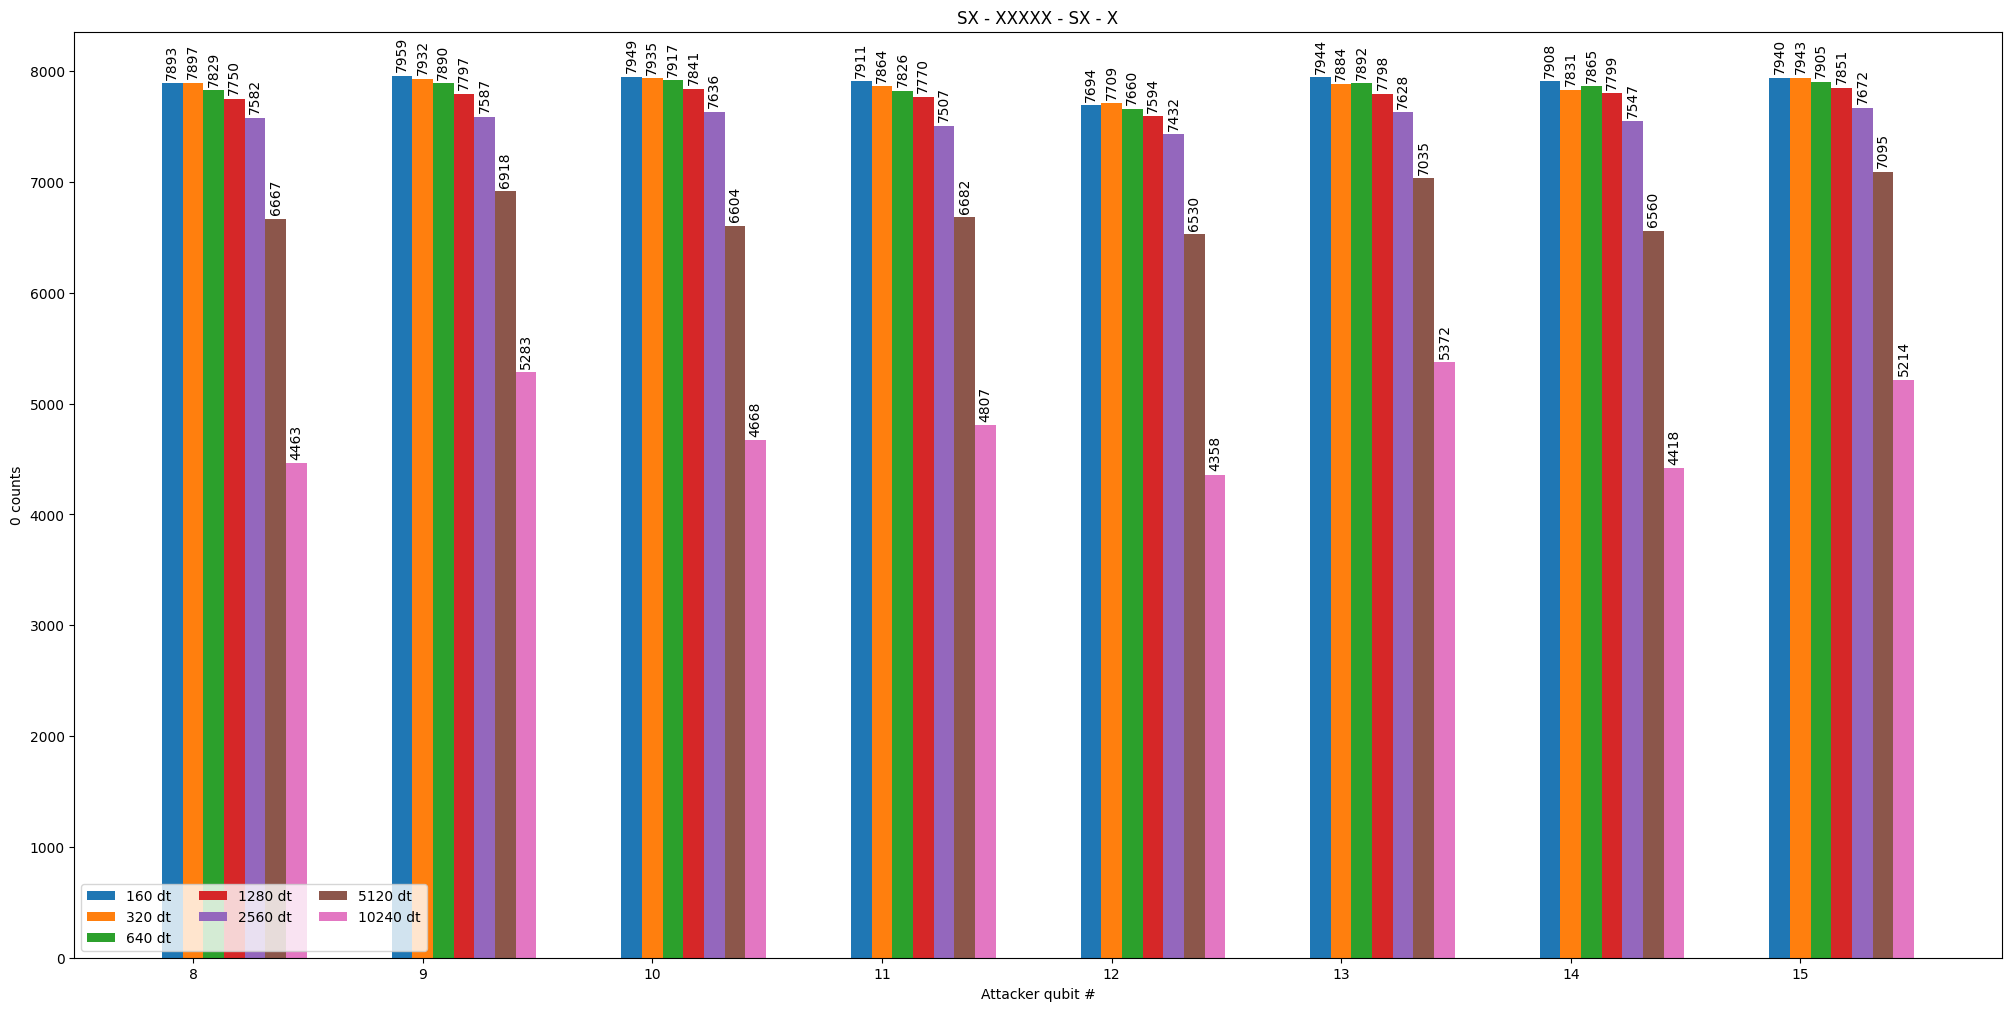

In [20]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## h_delayxx_h_qcs

In [24]:
counts_2 = split_counts[4]
delays = [ 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'h_delayxx_h_qcs'
snooper_qubits = range(16)

In [25]:
delays

[640, 1280, 2560, 5120, 10240]

range(0, 8)


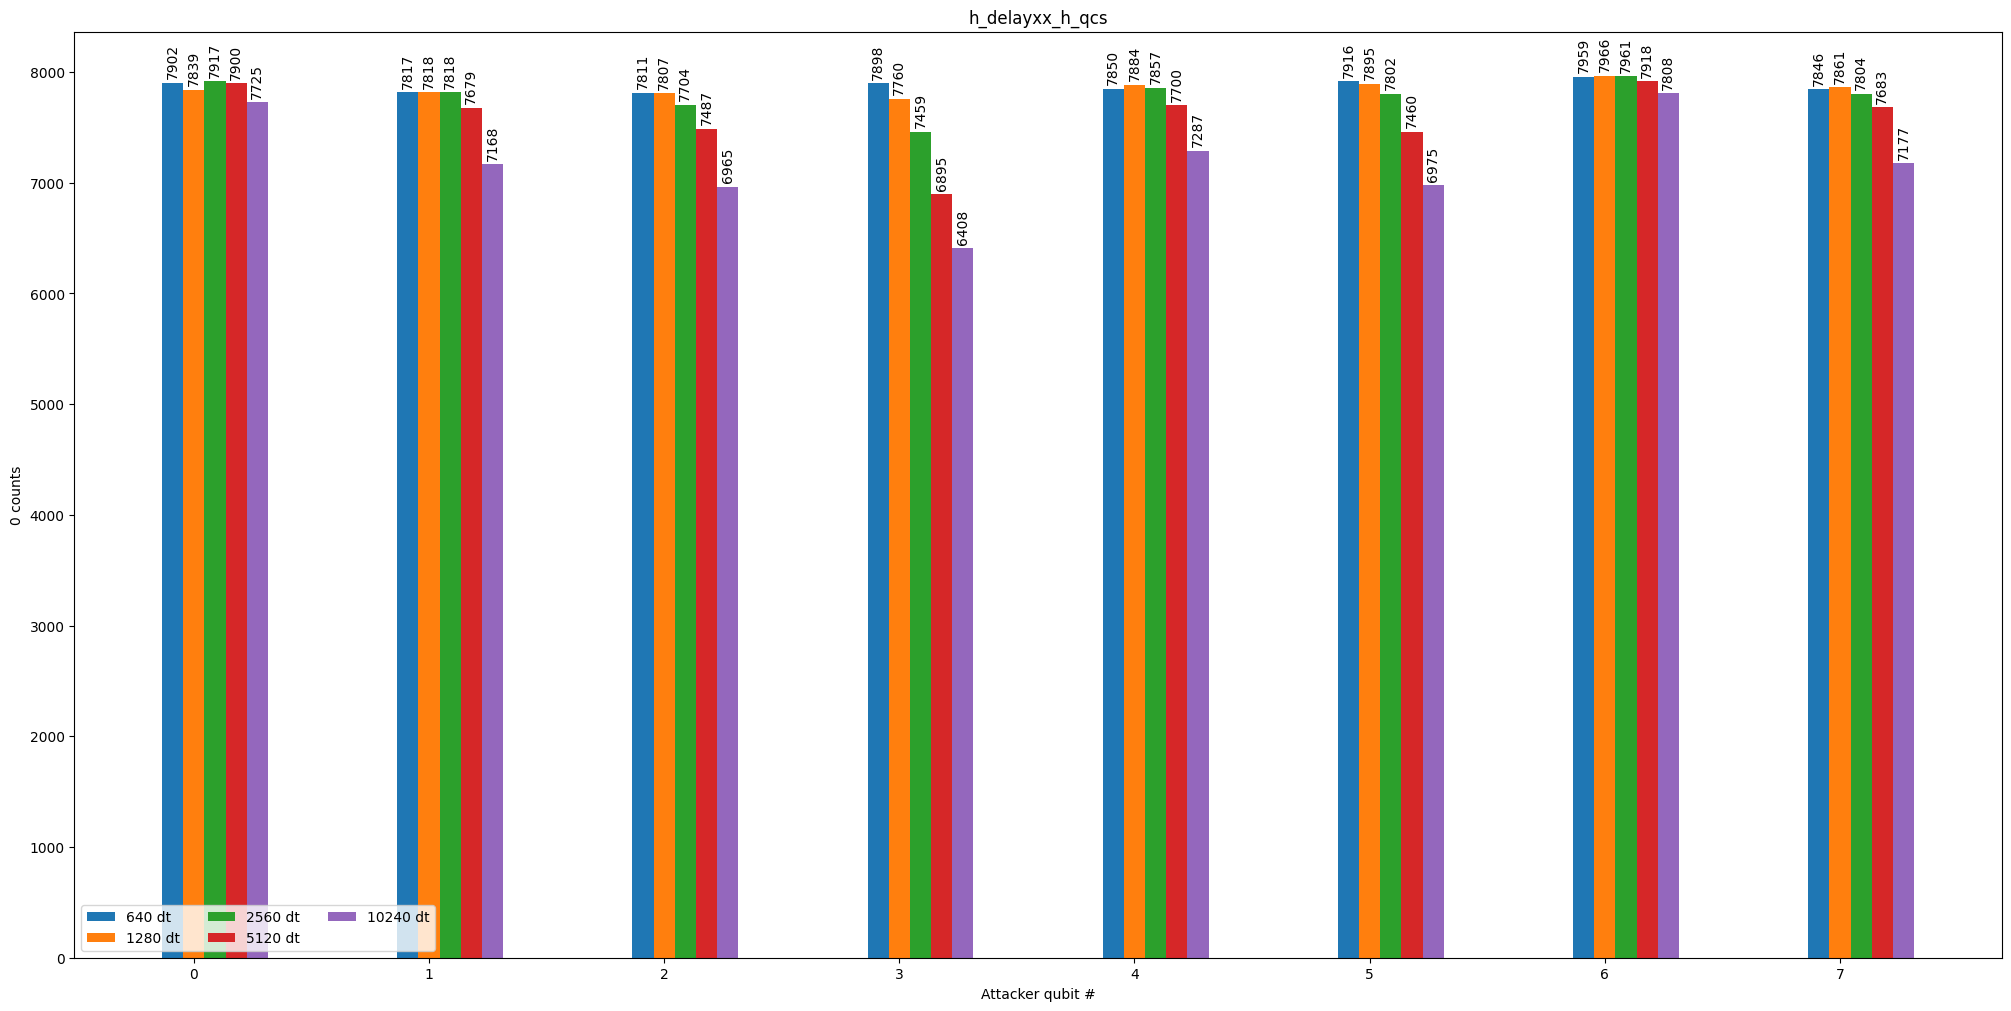

range(8, 16)


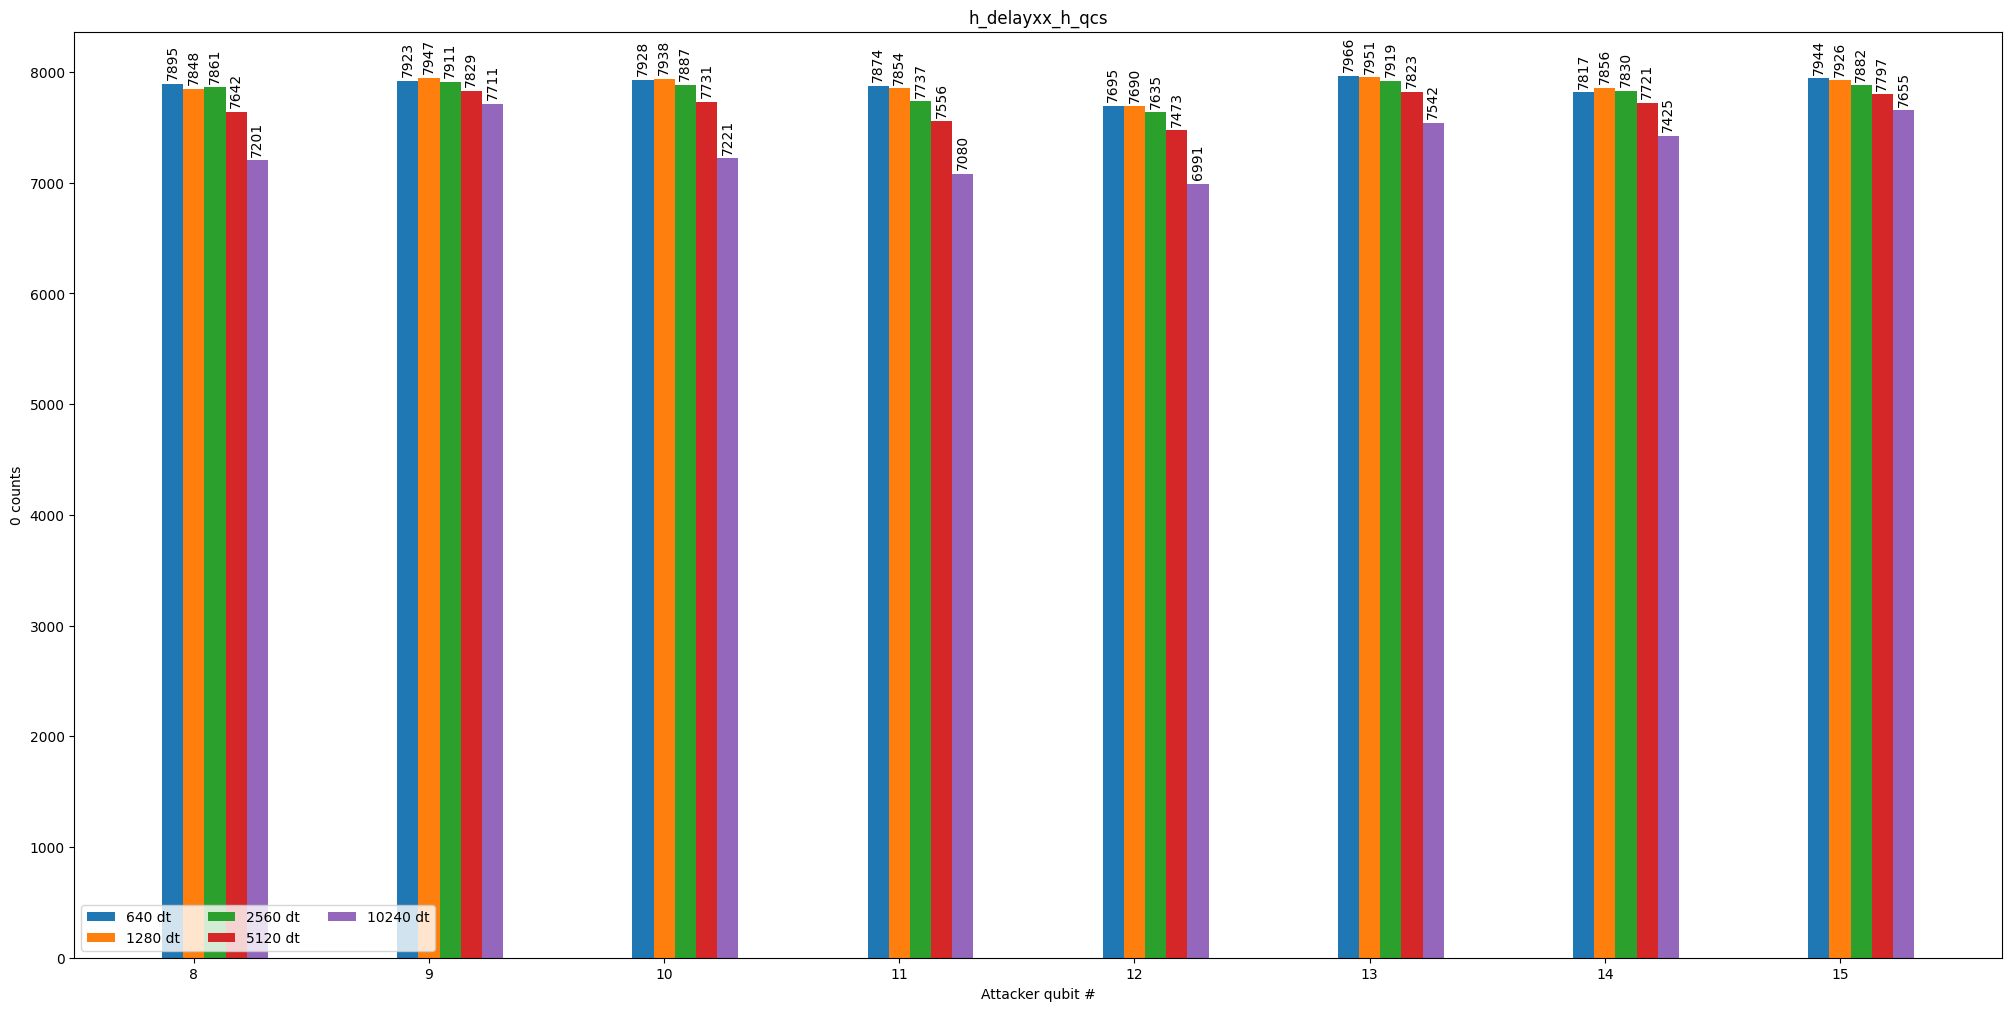

In [26]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## sx_delayxx_sx_x_qcs

In [27]:
counts_2 = split_counts[5]
delays = [ 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'sx_delayxx_sx_x_qcs'
snooper_qubits = range(16)

range(0, 8)


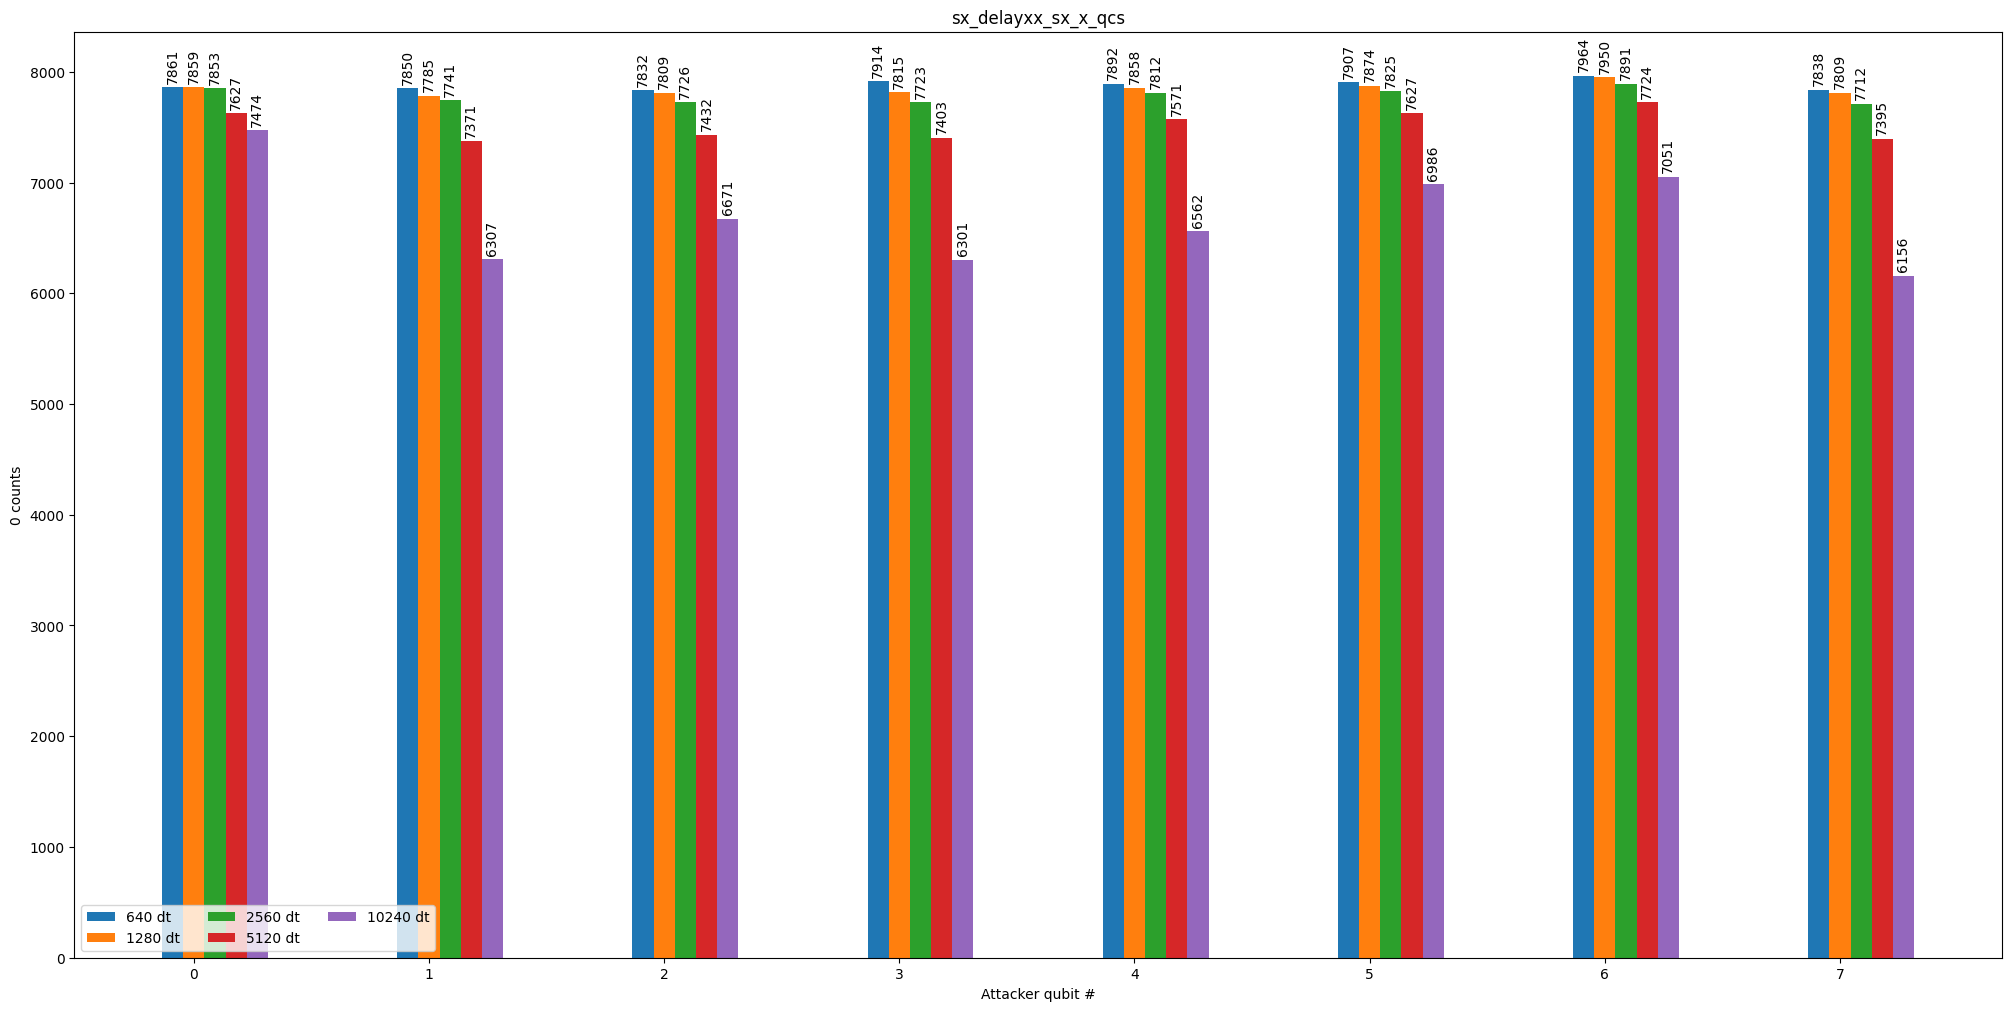

range(8, 16)


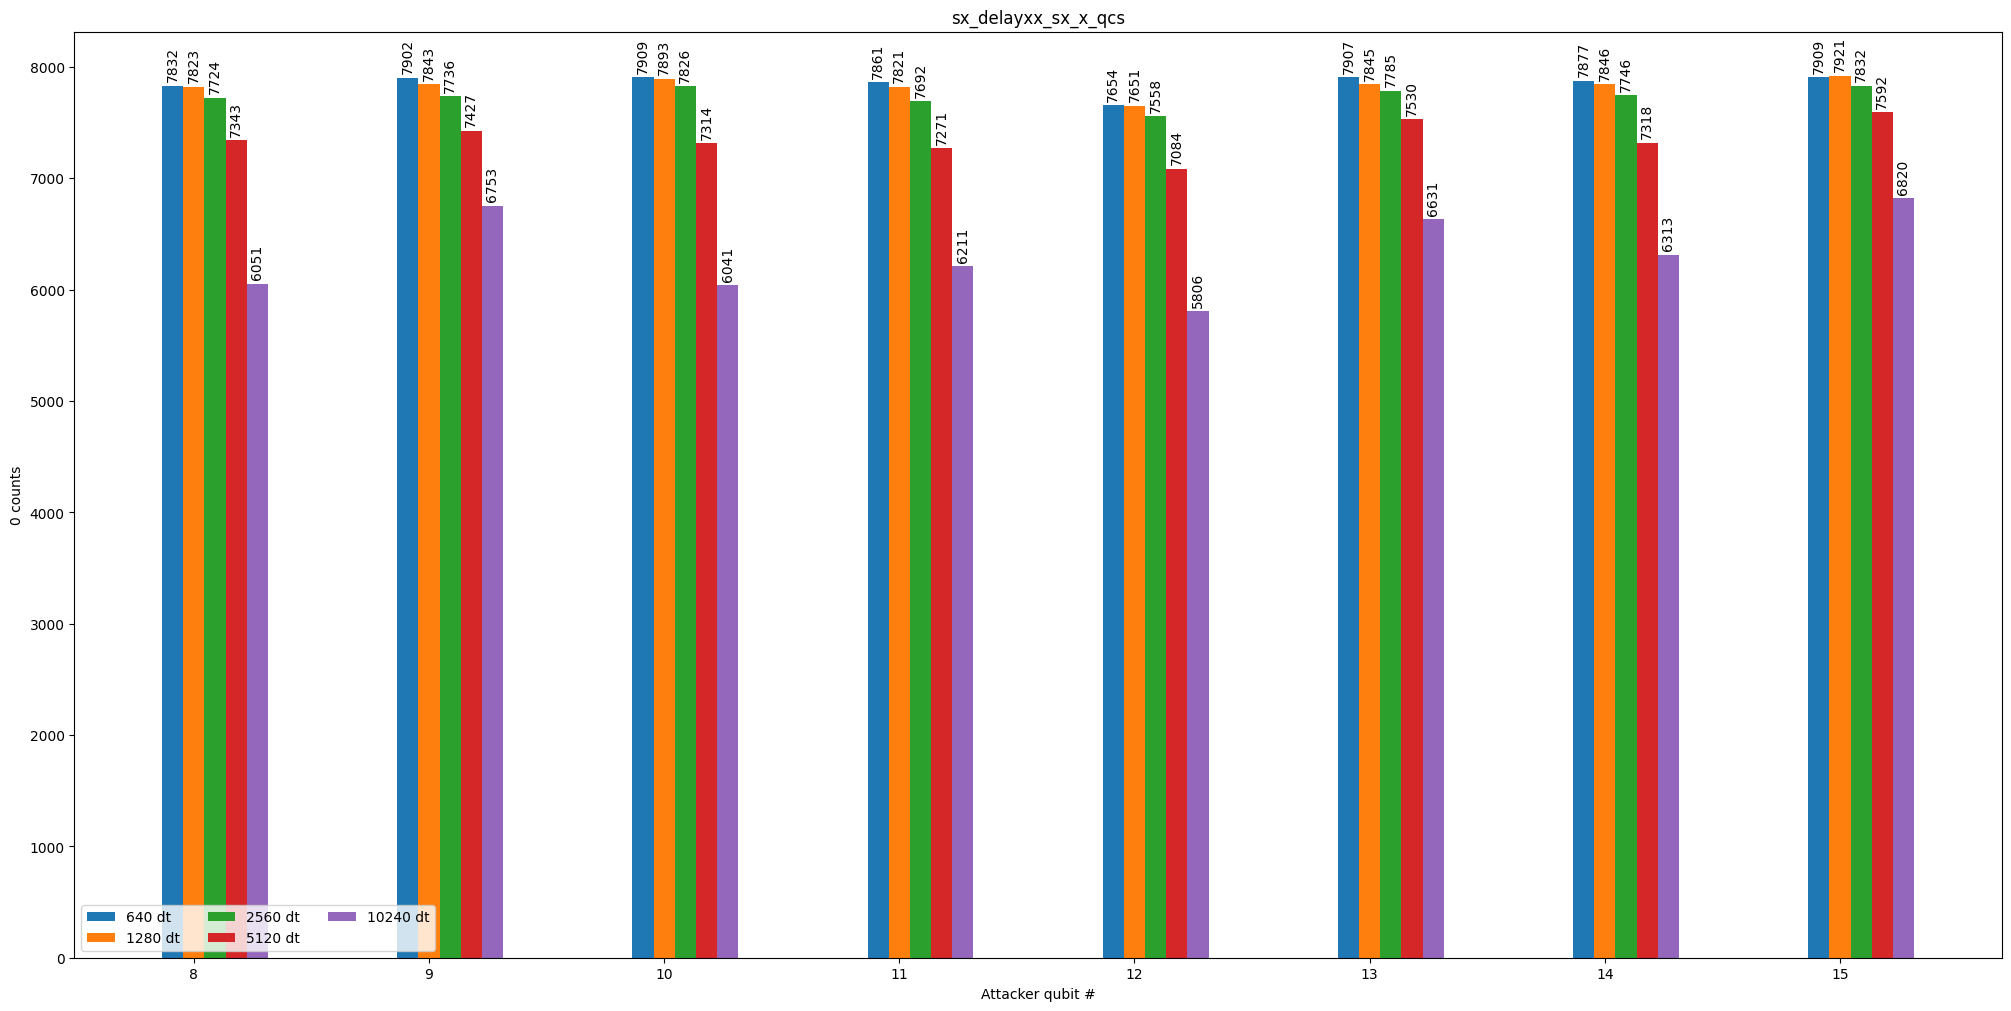

In [28]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

# New Analysis

In [31]:
delays_1 = np.array([ 160, 320, 640, 1280, 2560, 5120, 10240 ])
delays_2 = np.array([ 640, 1280, 2560, 5120, 10240 ])
snooper_qubits = range(16)

In [32]:
categories_1 = [
    'H-delay-H',
    'SX-delay-SX-X',
    'H-XXXX-H',
    'SX-XXXX-SX-X'
]

categories_2 = [
    'H-DD-H',
    'SX-DD-SX-X'
]

counts_1 = split_counts[0:4]
counts_2 = split_counts[4:6]

In [33]:
print(len(counts_1[0]))
print(len(counts_2[0]))

7
5


In [34]:
mcounts_1_by_qubit = {}
mcounts_2_by_qubit = {}

for qubit in range(16):
    mcounts_1 = {}
    mcounts_2 = {}

    for category_index, category in enumerate(categories_1):
        mcounts = []
        for counts, delay in zip(counts_1[category_index], delays_1):
            count = marginal_counts(counts, [snooper_qubits.index(qubit), ]).get('0', 0)
            mcounts.append(count)
        mcounts_1[category] = mcounts
    mcounts_1_by_qubit[qubit] = mcounts_1

    for category_index, category in enumerate(categories_2):
        mcounts = []
        for counts, delay in zip(counts_2[category_index], delays_2):
            count = marginal_counts(counts, [snooper_qubits.index(qubit), ]).get('0', 0)
            mcounts.append(count)
        mcounts_2[category] = mcounts
    mcounts_2_by_qubit[qubit] = mcounts_2
    

In [35]:
mcounts_1_by_qubit[0]

{'H-delay-H': [7896, 7888, 7844, 7662, 7723, 7611, 7309],
 'SX-delay-SX-X': [7877, 7885, 7797, 7671, 7613, 7558, 7231],
 'H-XXXX-H': [7919, 7868, 7884, 7883, 7880, 7900, 7769],
 'SX-XXXX-SX-X': [7940, 7890, 7857, 7863, 7864, 7557, 6885]}

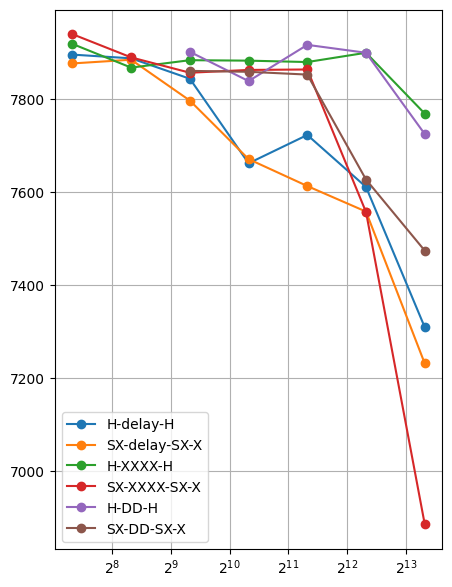

In [36]:
fig = plt.figure(figsize=(5, 7))
ax = fig.add_subplot(1, 1, 1)

for label, values in mcounts_1_by_qubit[0].items():
    # ax.plot(delays_1, values, label=label, marker='o')
    ax.semilogx(delays_1, values, base=2, label=label, marker='o')

for label, values in mcounts_2_by_qubit[0].items():
    # ax.plot(delays_1, values, label=label, marker='o')
    ax.semilogx(delays_2, values, base=2, label=label, marker='o')

ax.grid(True)
ax.legend()


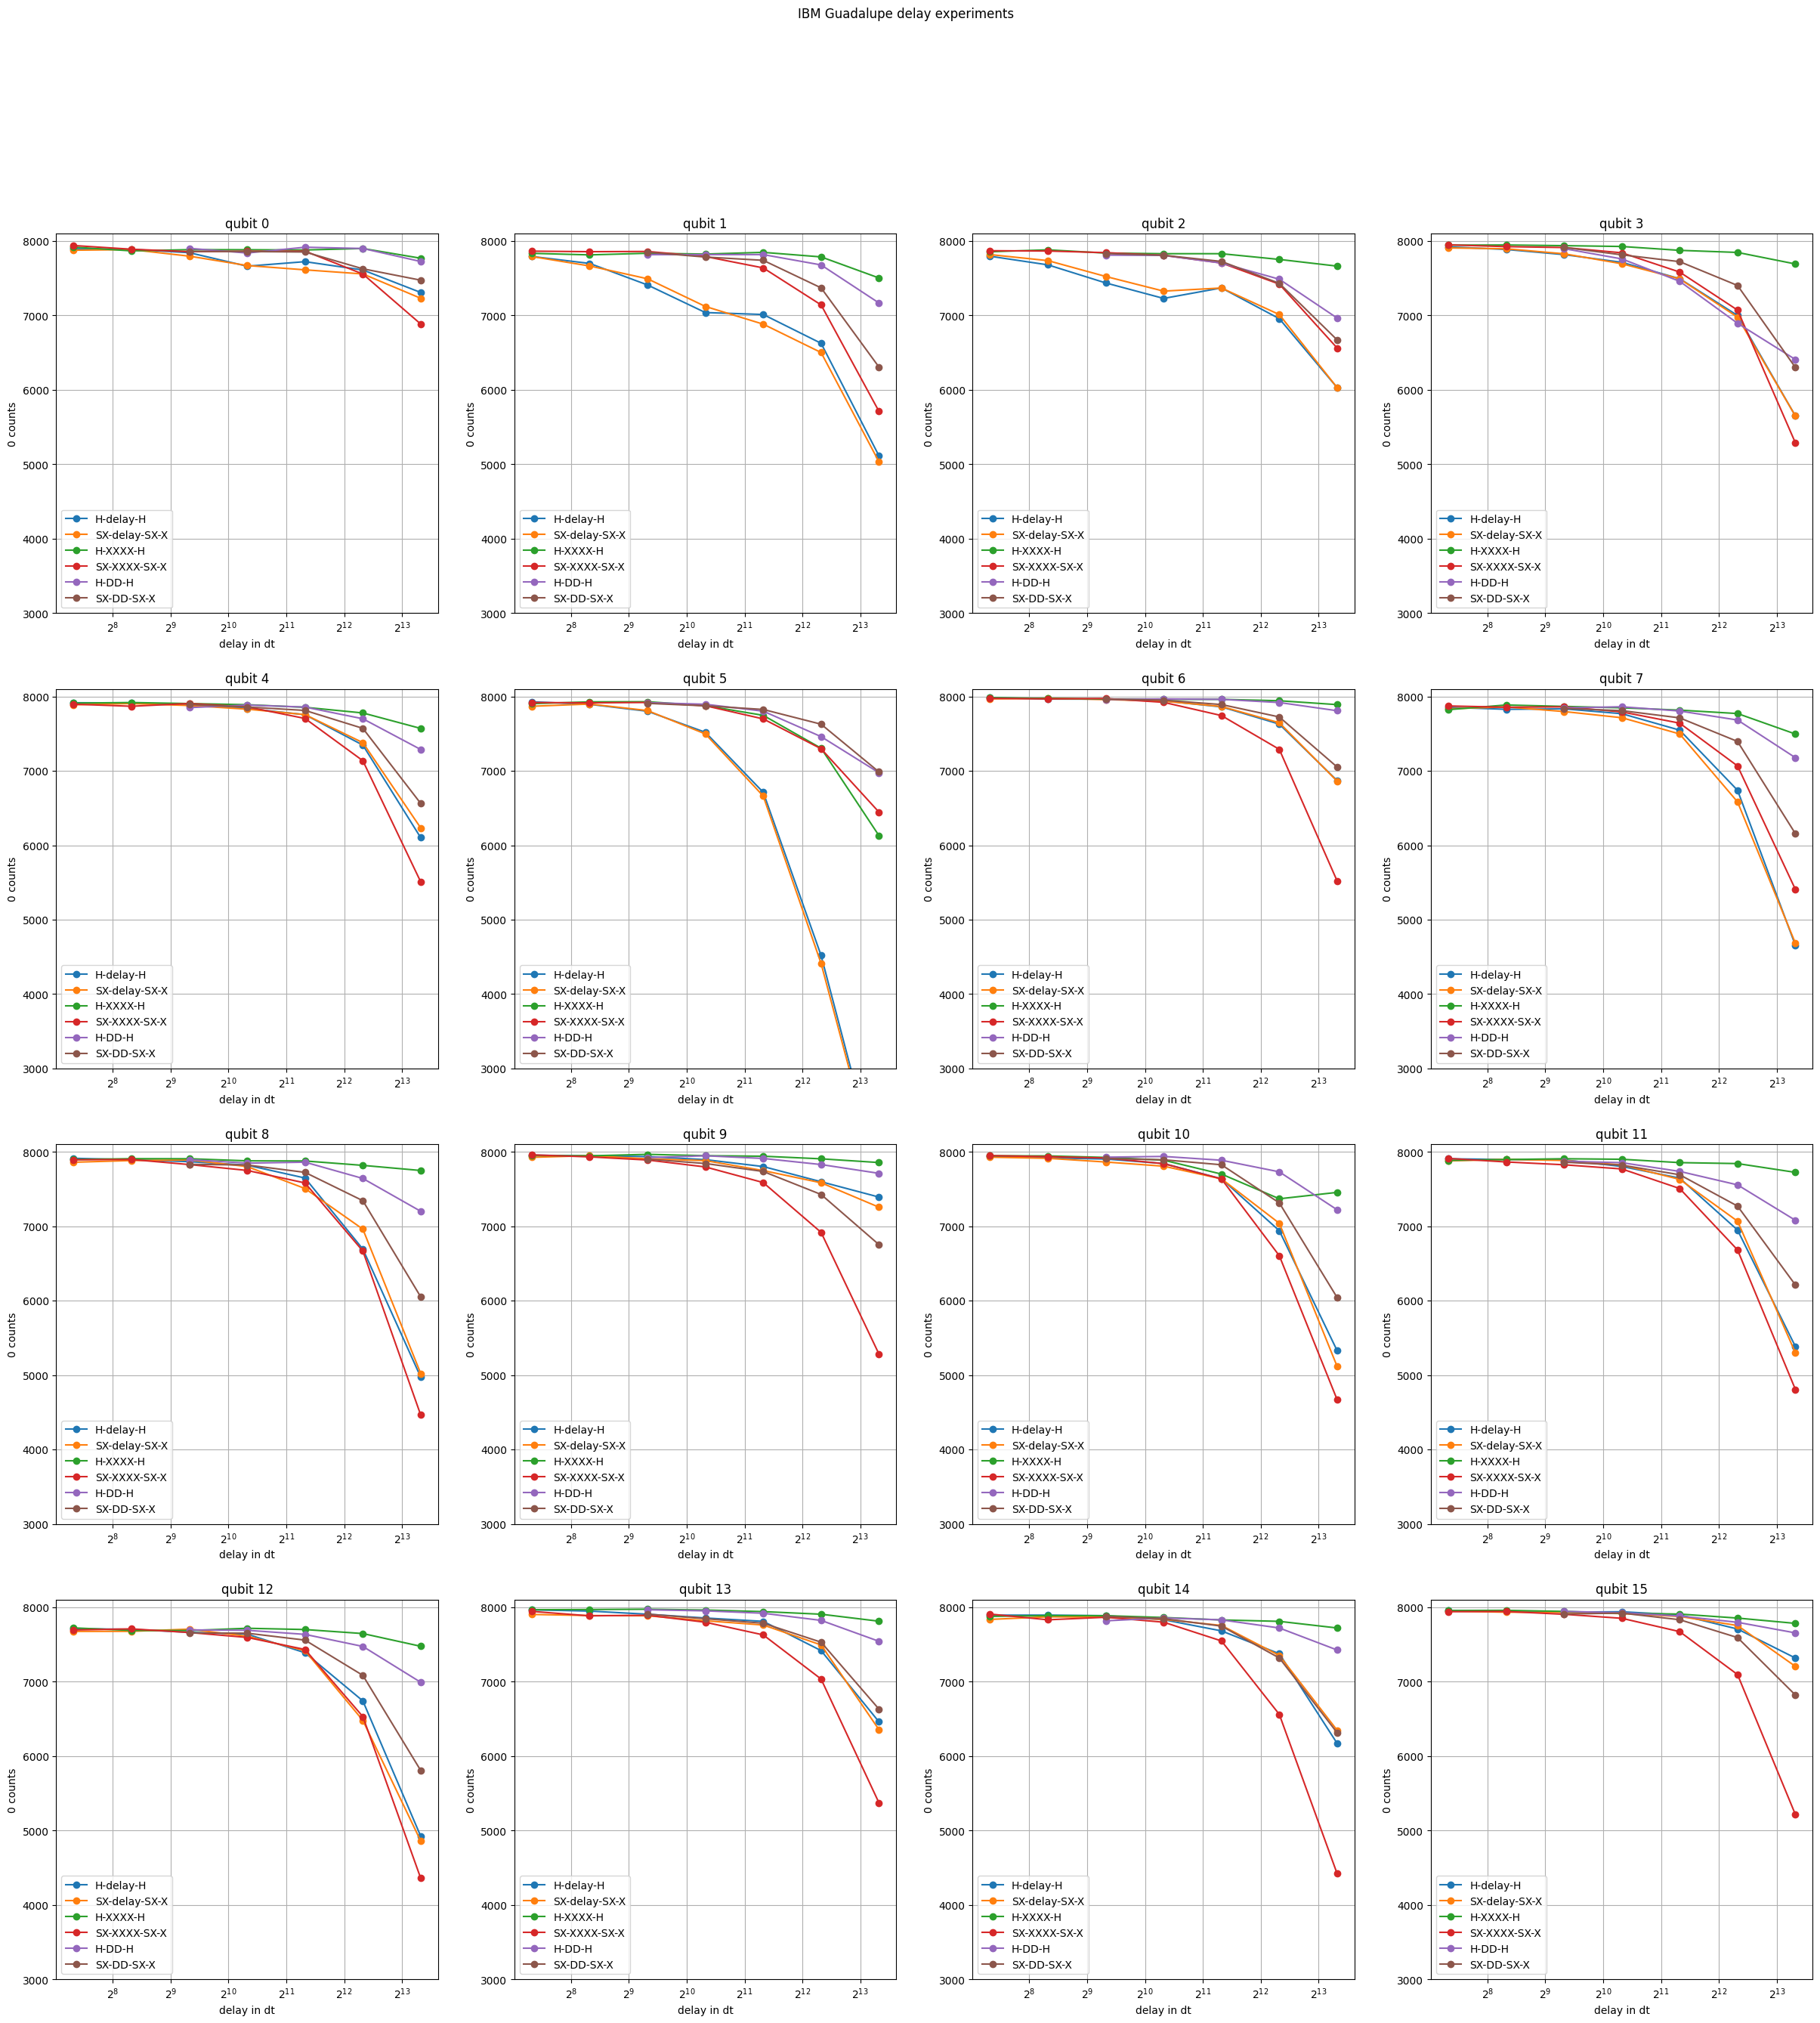

In [37]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(30, 30))

axes = fig.get_axes()
fig.suptitle('IBM Guadalupe delay experiments')

for qubit, ax in zip(range(16), axes):
    for label, values in mcounts_1_by_qubit[qubit].items():
        # ax.plot(delays_1, values, label=label, marker='o')
        ax.semilogx(delays_1, values, base=2, label=label, marker='o')

    for label, values in mcounts_2_by_qubit[qubit].items():
        # ax.plot(delays_1, values, label=label, marker='o')
        ax.semilogx(delays_2, values, base=2, label=label, marker='o')

    ax.grid(True)
    ax.legend()
    ax.set(title='qubit {}'.format(qubit), ylabel="0 counts", xlabel="delay in dt", ylim=(3000, 8100))

In [38]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)
config = backend.configuration()

config.dt

2.2222222222222221e-10

In [43]:
delays_1_dt = delays_1*config.dt*1e+9
delays_2_dt = delays_2*config.dt*1e+9

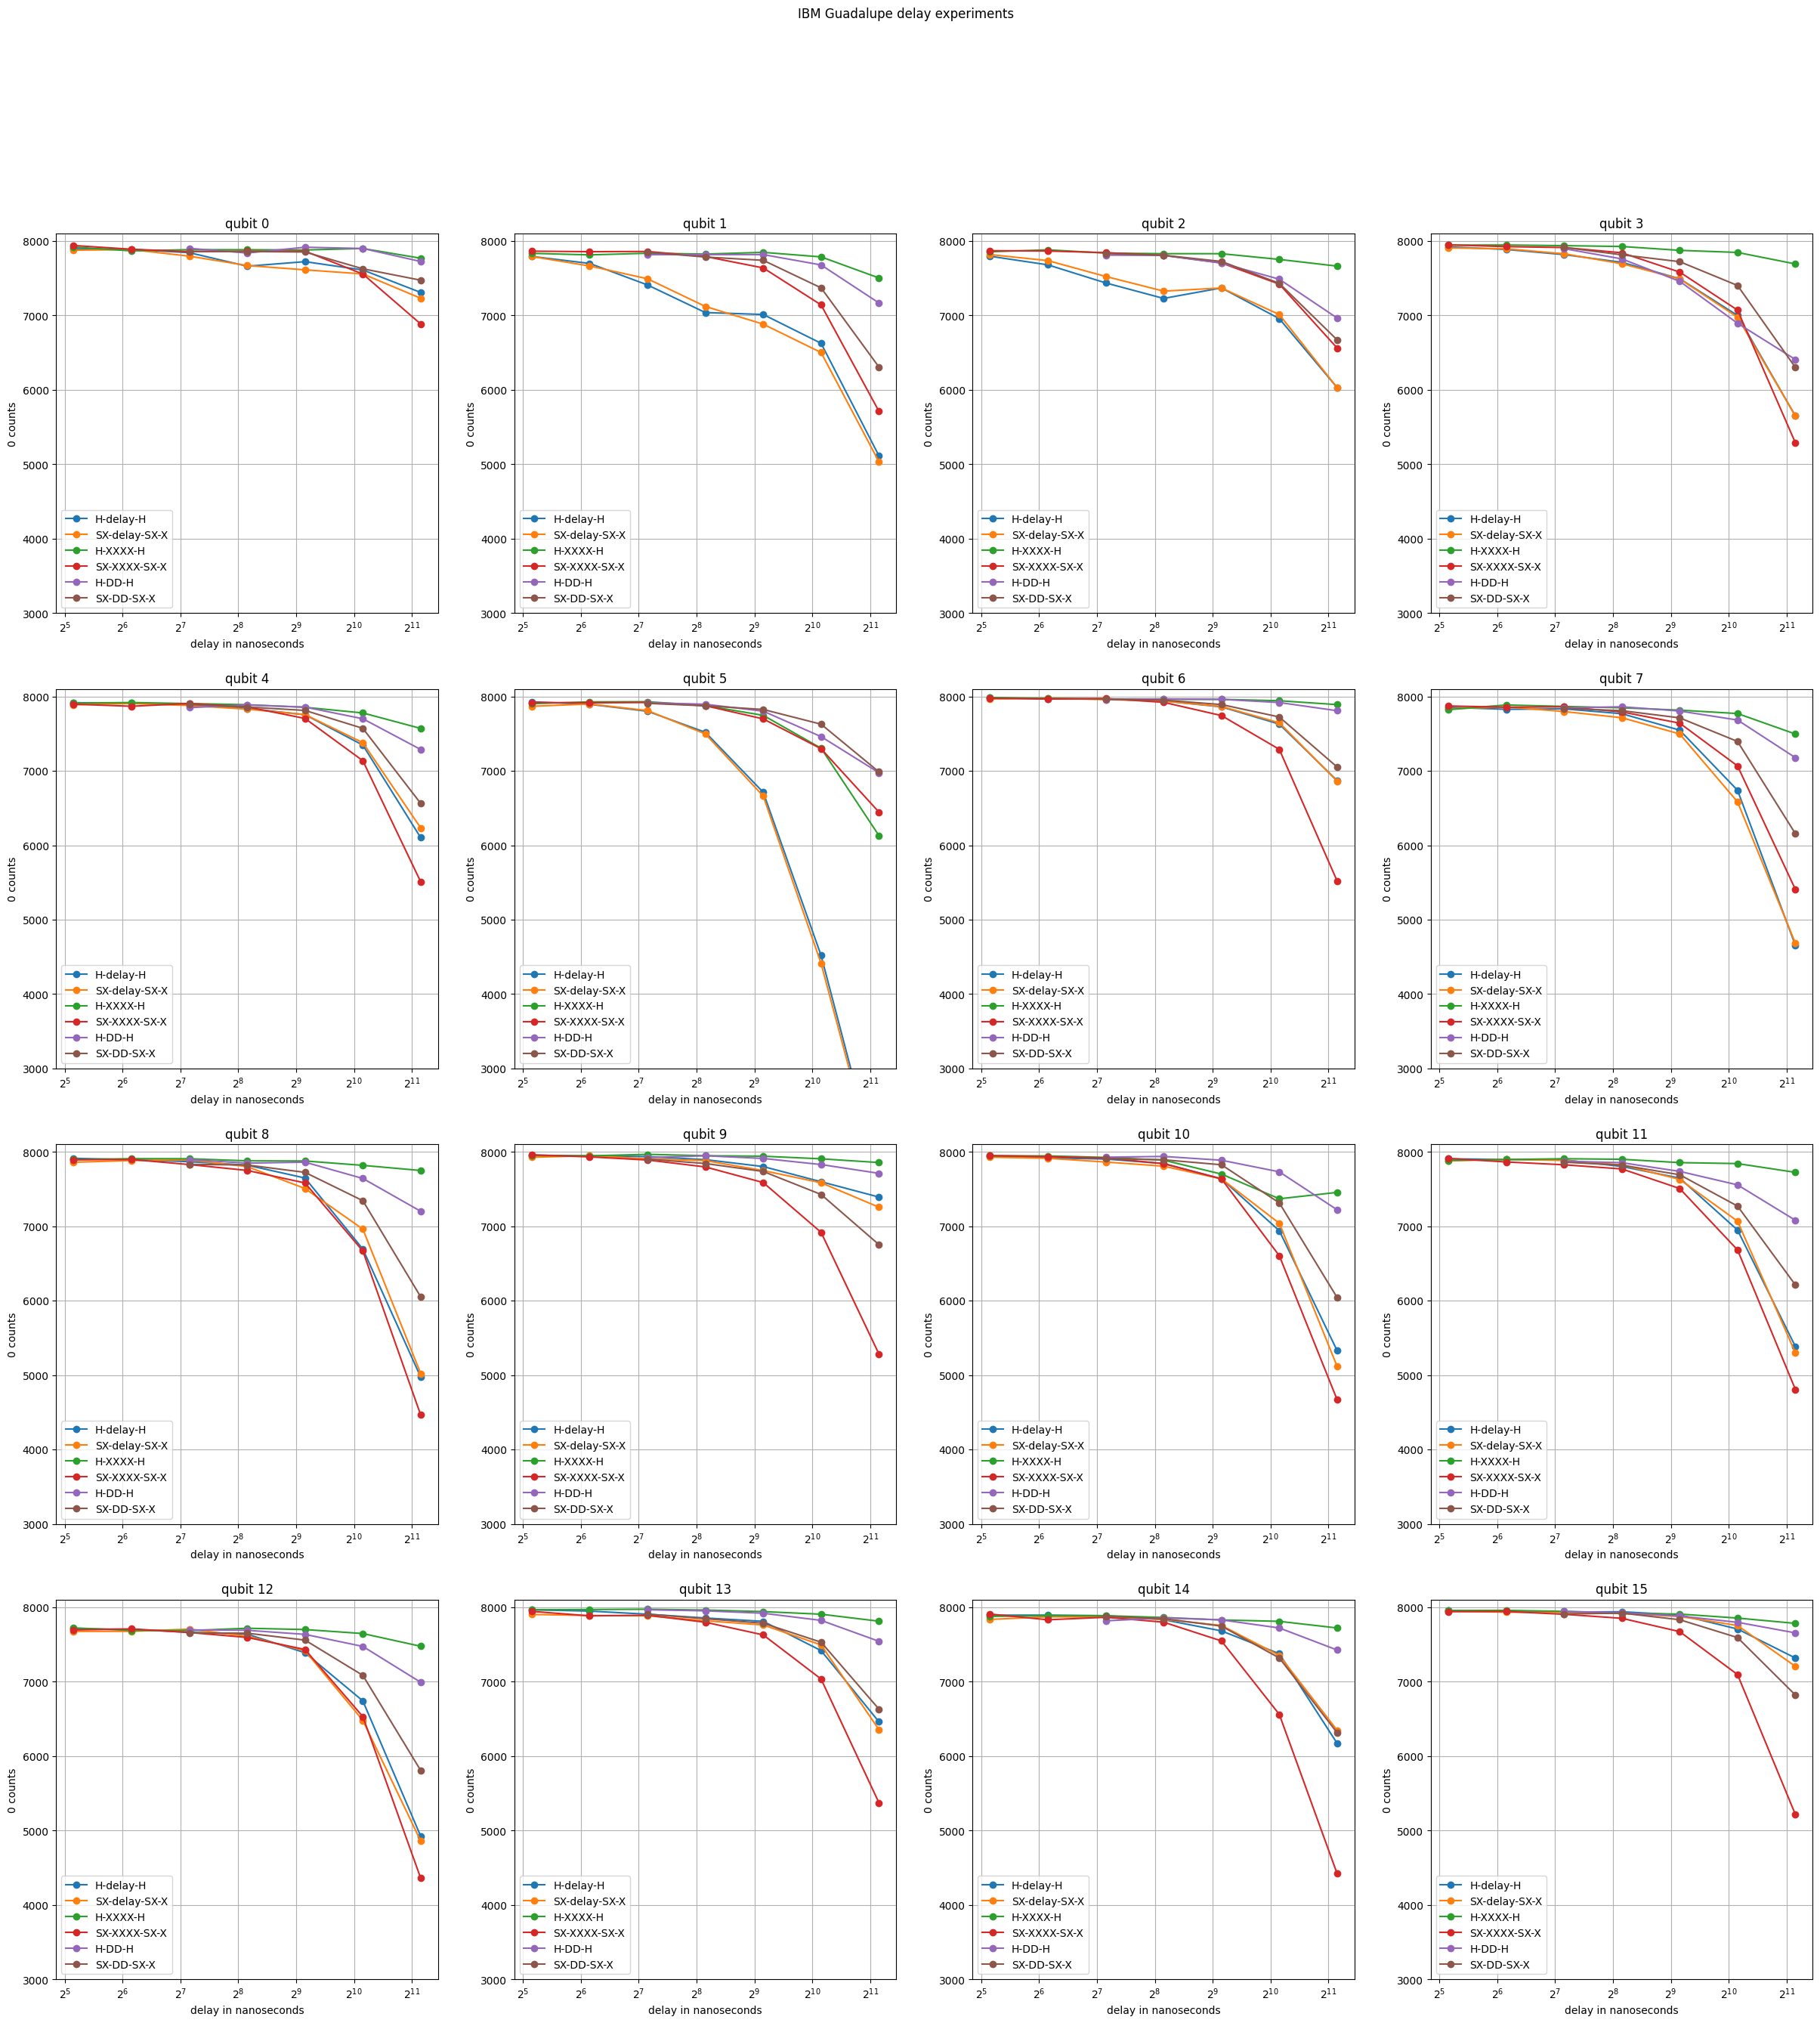

In [44]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(30, 30))

axes = fig.get_axes()
fig.suptitle('IBM Guadalupe delay experiments')

for qubit, ax in zip(range(16), axes):
    for label, values in mcounts_1_by_qubit[qubit].items():
        # ax.plot(delays_1, values, label=label, marker='o')
        ax.semilogx(delays_1_dt, values, base=2, label=label, marker='o')

    for label, values in mcounts_2_by_qubit[qubit].items():
        # ax.plot(delays_1, values, label=label, marker='o')
        ax.semilogx(delays_2_dt, values, base=2, label=label, marker='o')

    ax.grid(True)
    ax.legend()
    ax.set(title='qubit {}'.format(qubit), ylabel="0 counts", xlabel="delay in nanoseconds", ylim=(3000, 8100))